# Machine Learning Project - Part 1
## 2024/2025 - Group 16
Sarah Leuthner, 20240581 </br>
Bárbara Capitão, 20211532 </br>
Ricardo Kayseller, 20230450 </br>
Ludovica Collé, 20241449 </br>
Elisa Pacheco, 20240600 </br>

# **Index**
1. [Import Libaries](#imports) </br>
</br>
2. [Data Understanding](#dataunderstanding) </br>
2.1 [Data Exploration](#dataexploration) </br>
2.2 [Visualizations](#visuals) </br>
2.2.1 [Numeric Features](#numerics) </br>
2.2.2 [Categorical Features](#categoricals) </br>
2.2.3 [Targets](#targets) </br>
2.2.4 [Other Visualizations](#others) </br>
</br>
3. [Data Preparation](#datapreparation) </br>
3.1 [Splitting Data](#datasplit) </br>
3.2 [Missing Values](#missingvalues) </br>
3.3 [Outliers](#outliers) </br>
3.4 [Variable Encoding](#enconding) </br>
3.5 [New Features](#newfeatures) </br>
</br>
4. [Feature Selection](#featureselection) </br>
4.1 [Decision Tree](#DT) </br>
4.2 [RFE](#RFE) </br>
4.3 [LASSO](#LASSO) </br>
4.3 [Important Variables from Feature Selection](#importantvariablesFS) </br>
</br>
4. [Modelling](#Modelling) </br>
</br>

<a class="anchor" id="imports">
    
## 1. Import Libaries

</a>

In [2125]:
import pandas as pd
import seaborn as sns
import numpy as np 
import os
import missingno as msno
from scipy import stats

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil

#To get plots with better resolution 
%config InlineBackend.figure_format = 'retina'

import sqlite3

from sklearn import datasets
import math
from itertools import product
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from datetime import datetime

#KNN Imputer
from sklearn.impute import KNNImputer

#Data Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
sns.set()


from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold


#Matplotlib functions to create MiniSOM visualizations
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib import colors as mpl_colors
from matplotlib.lines import Line2D
from matplotlib import __version__ as mplver

#Outlier and noise filtering
from collections import Counter

#Feature Selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.feature_selection import RFECV

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2126]:
#import the csv file to the notebook
data_set = pd.read_csv('train_data.csv')
#data_set = pd.read_csv(r"C:\Users\Bárbara C\Desktop\Mestrado\Machine lerninig\project_data\train_data.csv")
#data_set = pd.read_csv('/Users/ricardokayseller/Desktop/Group work ML/project_data/train_data.csv')

In [2127]:
#test_set = pd.read_csv(r"C:\Users\Bárbara C\Desktop\Mestrado\Machine lerninig\project_data\test_data.csv")
test_set = pd.read_csv('test_data.csv')
test = test_set.copy()



In [2128]:
test.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5


In [2129]:
df = data_set.copy()

In [2130]:
# Find the duplicate Claim Identifier values
duplicate_ids = df['Claim Identifier'][df['Claim Identifier'].duplicated()]

# Display the actual duplicate Claim Identifiers
print("Duplicate Claim Identifiers:")
for claim_id in duplicate_ids.unique():
    print(claim_id)

# Filter the DataFrame to show all rows with these duplicate Claim Identifiers
duplicates = df[df['Claim Identifier'].duplicated(keep=False)]

# Sort the result by 'Claim Identifier' for easier visualization
duplicates_sorted = duplicates.sort_values(by='Claim Identifier')

# Display the duplicate records
print("\nRecords with duplicate Claim Identifiers:")
print(duplicates_sorted)


Duplicate Claim Identifiers:
292668076

Records with duplicate Claim Identifiers:
       Accident Date  Age at Injury Alternative Dispute Resolution  \
257901           NaN            NaN                            NaN   
526445           NaN            NaN                            NaN   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
257901    2021-05-21                     NaN                  NaN         NaN   
526445    2022-09-05                     NaN                  NaN         NaN   

       C-2 Date C-3 Date Carrier Name  ... WCIO Cause of Injury Code  \
257901      NaN      NaN          NaN  ...                       NaN   
526445      NaN      NaN          NaN  ...                       NaN   

        WCIO Cause of Injury Description WCIO Nature of Injury Code  \
257901                               NaN                        NaN   
526445                               NaN                        NaN   

       WCIO Nature of Injury Des

as we can see the Claim Identifier 292668076 is duplicated and the rows are not equal 'Assembly date' is different in both records so the best approach is to remove both rows

In [2132]:
# Identify all duplicate 'Claim Identifier' values
duplicate_ids = df['Claim Identifier'][df['Claim Identifier'].duplicated(keep=False)]

# Remove all rows with duplicate 'Claim Identifier' values
df = df[~df['Claim Identifier'].isin(duplicate_ids)]

In [2133]:
#Set the index
df = df.set_index('Claim Identifier')
df = df.sort_index()

In [2134]:
df.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393066,2019-09-17,64.0,N,2020-01-01,N,1345.97,1954.0,2020-01-01,NaN,HARTFORD FIRE INSURANCE CO,...,97.0,REPETITIVE MOTION,46.0,RUPTURE,38.0,SHOULDER(S),NaN,1.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393667,2019-12-23,54.0,N,2020-01-01,N,0.00,1965.0,2020-01-01,NaN,"DELHAIZE AMERICA, LLC",...,30.0,"SLIP, OR TRIP, DID NOT FALL",10.0,CONTUSION,55.0,ANKLE,12189,0.0,Not Work Related,3.0
5393769,2019-11-14,56.0,N,2020-01-02,N,0.00,0.0,NaN,NaN,SAFETY NATIONAL CASUALTY CORP,...,NaN,NaN,NaN,NaN,NaN,NaN,18426,0.0,Not Work Related,6.0
5393770,2019-12-31,26.0,N,2020-01-02,N,0.00,1993.0,2020-01-02,2019-12-31,STATE INSURANCE FUND,...,12.0,OBJECT HANDLED,10.0,CONTUSION,36.0,FINGER(S),13202,0.0,Not Work Related,5.0


<a class="anchor" id="dataunderstanding">
    
## 2. Data Unterstanding

</a>

<a class="anchor" id="dataexploration">
    
### 2.1 Data Exploration

</a>

In [2137]:
#check the dimensions of dataframe
df.shape

(593469, 32)

In [2138]:
test.shape

(387975, 30)

In [2139]:
#check the columns in dataframe
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Agreement Reached',
       'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [2140]:
test.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Number of Dependents'],
      dtype='object')

In [2141]:
#check the data type of each column and evidence of missing values among many variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593469 entries, 5393066 to 999891667
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593469 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

In [2142]:
#convert the accident date to the type of datatime to get all the values of this variable
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
df['First Hearing Date'] = pd.to_datetime(df['First Hearing Date'], errors='coerce')
df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], errors='coerce')

df['C-2 Date'] = pd.to_datetime(df['C-2 Date'])
df['C-3 Date'] = pd.to_datetime(df['C-3 Date'])

In [2143]:
#convert the accident date to the type of datatime to get all the values of this variable
test['Accident Date'] = pd.to_datetime(test['Accident Date'], errors='coerce')
test['First Hearing Date'] = pd.to_datetime(test['First Hearing Date'], errors='coerce')
test['Assembly Date'] = pd.to_datetime(test['Assembly Date'], errors='coerce')

test['C-2 Date'] = pd.to_datetime(test['C-2 Date'])
test['C-3 Date'] = pd.to_datetime(test['C-3 Date'])

**Notes on the DataFrame Information:**
* Dates are objects 
* Floats can be changed integers (expect maybe for "Average Weekly Wage")
* Check to see, if "Average Weekly Wage" needs to be a float 
* "Agreement Reached" = according to metadata is boolean
* Explore ways to simplify "Carrier Type", "Claim Injury Type" and "Medical Fee Region", for better handling? -> change into integers
* Description features can be dropped: OIICS Nature of Injury Description (no data), WCIO Cause of Injury Description, WCIO Nature of Injury Description, WCIO Part Of Body Description (-> Decription only needed for interpretation, no different value than the codes) </br>
</br>
* Most columns have object values
* There are missing values in most of the columns
* "OIICS Nature of Injury Description" can be droppped -> no values

In [2145]:
#check the central tendency measures
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,570337,2021-04-28 21:00:27.892982528,1961-09-06 00:00:00,2020-09-14 00:00:00,2021-06-27 00:00:00,2022-03-21 00:00:00,2023-09-29 00:00:00,NaN
Age at Injury,574026.0,42.11427,0.0,31.0,42.0,54.0,117.0,14.256432
Assembly Date,593469,2021-07-19 03:24:46.765442816,2020-01-01 00:00:00,2020-10-26 00:00:00,2021-07-29 00:00:00,2022-04-19 00:00:00,2022-12-31 00:00:00,NaN
Average Weekly Wage,545375.0,491.088321,0.0,0.0,0.0,841.0,2828079.0,6092.91812
Birth Year,544948.0,1886.767604,0.0,1965.0,1977.0,1989.0,2018.0,414.644423
C-2 Date,559466,2021-07-16 20:11:19.865442816,1996-01-12 00:00:00,2020-11-06 00:00:00,2021-08-09 00:00:00,2022-04-26 00:00:00,2024-06-01 00:00:00,NaN
C-3 Date,187245,2021-07-26 21:31:28.449892608,1992-11-13 00:00:00,2020-10-27 00:00:00,2021-07-21 00:00:00,2022-04-20 00:00:00,2024-05-31 00:00:00,NaN
First Hearing Date,150798,2022-03-19 05:07:38.218279168,2020-01-30 00:00:00,2021-06-01 00:00:00,2022-03-09 00:00:00,2023-01-11 00:00:00,2024-06-07 00:00:00,NaN
IME-4 Count,132803.0,3.207337,1.0,1.0,2.0,4.0,73.0,2.832303
Industry Code,564068.0,58.645305,11.0,45.0,61.0,71.0,92.0,19.644175


In [2146]:
#check the central tendency measures
df.describe(include="O").T

,count,unique,top,freq
Alternative Dispute Resolution,574026,3,N,571412
Attorney/Representative,574026,2,N,392291
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430
COVID-19 Indicator,574026,2,N,546505
District Name,574026,8,NYC,270779
Gender,574026,4,M,335218
Industry Code Description,564068,20,HEALTH CARE AND SOCIAL ASSISTANCE,114339


### Key Observations:

1. **Accident Date**:
   - **Count**: 570,337 entries.
   - **Unique Values**: 5,539 different accident dates, with the most frequent being March 1, 2020.
   - **Relevance**: Dates are well-represented with many unique values, indicating a broad range of accidents over time.

2. **Age at Injury**:
   - **Mean Age**: 42.1 years, with a standard deviation of 14.26, showing variability in the age of injured workers.
   - **Min/Max Age**: 0 years (likely erroneous) to 117 years, indicating potential data quality issues.
   - **Relevance**: Age distribution seems reasonable, but some data cleaning (e.g., unrealistic ages) might be needed.

3. **Alternative Dispute Resolution**:
   - **Most Common Value**: "No" (N), representing 571,412 cases, showing that ADR is rarely used.
   - **Relevance**: This suggests that most cases do not involve alternative resolution mechanisms.

4. **Attorney/Representative**:
   - **Most Common Value**: "No" (N), with 392,291 cases, indicating that most workers do not have legal representation.
   - **Relevance**: This may reflect the accessibility of legal resources for workers or the nature of claims.

5. **Average Weekly Wage**:
   - **Mean**: $491.09, with a very high standard deviation ($6,092), indicating outliers and wage variability.
   - **Relevance**: The wide range, from $0 to over $2.8 million, suggests outliers or extreme cases that may need further investigation.

6. **Birth Year**:
   - **Mean**: 1886 (clearly an error), with a large standard deviation.
   - **Relevance**: This column has significant data quality issues and should be cleaned (many birth years are unrealistic).

7. **Carrier Name**:
   - **Most Common Carrier**: "State Insurance Fund" with 111,144 entries.
   - **Relevance**: This suggests that this insurance carrier is prominent, possibly reflecting government-backed insurance.

8. **COVID-19 Indicator**:
   - **Most Common Value**: "No" (N), indicating that most cases are not related to COVID-19.
   - **Relevance**: This dataset covers a broad time range, with few cases related to the pandemic.

9. **Gender**:
   - **Most Common Value**: Male (335,218 entries), showing a gender imbalance in the dataset.
   - **Relevance**: Gender differences could be relevant for understanding the demographic distribution of injuries.

10. **Industry Code Description**:
    - **Most Common Industry**: "Health Care and Social Assistance" with 114,339 entries.
    - **Relevance**: This suggests that this industry is heavily represented, which could be significant for occupational health studies.

11. **Zip Code**:
    - **Mean Zip Code**: 12,500, but with a wide range (min = 0, max = 99,999), suggesting some invalid data.
    - **Relevance**: Location data could be useful, but some zip codes may need to be cleaned (e.g., zero or very high values).

12. **WCB Decision**:
    - **Most Common Value**: "Not Work Related" for all 574,026 entries.
    - **Relevance**: This indicates that this dataset is filtered for non-work-related cases, which is an important context for any analysis.

13. **Number of Dependents**:
    - **Mean**: 3 dependents, with a max of 6.
    - **Relevance**: Understanding the family context of injured workers can be important for claims analysis.

### Final Notes:
- **Data Quality**: Some columns, such as "Birth Year" and "Average Weekly Wage," show extreme or incorrect values, indicating the need for data cleaning before further analysis.
- **Wage Variability**: The wide range in wages (from $0 to over $2.8 million) suggests significant disparities, possibly due to outliers or varying types of claims.
- **Demographic Insights**: The dataset covers a broad demographic, but there is a gender imbalance (more males), and certain industries (e.g., health care) are heavily represented.
- **Filtered Data**: The "WCB Decision" column shows that all cases are "Not Work Related," meaning the dataset is focused on non-occupational claims.

**Descripitive Statistics for data:**
* Injury occure mostly for people older than 31 years, with the majority between 31 and 54 years. The minimum of 0 years implicates missing data, the maximum age of 117 years could be false data or an extreme outlier
* The minimum year in Birth Year it's 0 this is an error
* The maxium value in Average Weekly Wage it's very high could be a false data or an extreme outlier if we check the minimun and the other stastistics about this variable
* We don't have any information about OIICS Nature of Injury Description
* In WCIO Part Of Body Code the minimum value is negative could be false data or an input error

### 2.2. Checking incoherences

In [2150]:
#COVID-19 Indicator is "Y" for cases before the pandemic (e.g., before 2020).
# Convert 'Accident Date' column to datetime if not already
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')

# Filter for rows where COVID-19 Indicator is "Y" and Accident Date is before 2020
pre_pandemic_covid_cases = df[(df['COVID-19 Indicator'] == 'Y') & (df['Accident Date'] < '2020-01-01')]

# Display the rows with inconsistencies
print(pre_pandemic_covid_cases)

# Count the number of such cases
print(f"Number of pre-2020 COVID-19 cases: {len(pre_pandemic_covid_cases)}")


                 Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5401736             2019-12-17           29.0                              N   
5642885             2019-12-22           53.0                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5401736             2020-01-13                       Y               2141.8   
5642885             2021-01-25                       N                  0.0   

                  Birth Year   C-2 Date   C-3 Date              Carrier Name  \
Claim Identifier                                                               
5401736               1990.0 2020-01-30 2020-01-08  POLICE, FIRE, SANITATION   
5642885               1966.0 2021-01-23        NaT     NYU LANGONE HOSPITALS   

                  ... WCIO Cause of Injur

In [2151]:
#Age at Injury=Accident Year−Birth Year

In [2152]:
#Age vs. Wages:

#Very young workers (e.g., age < 18) with unusually high Average Weekly Wage.
# Define a threshold for an unusually high wage, e.g., greater than $2000 per week
high_wage_threshold = 2000

# Filter for rows where Age at Injury is less than 18 and Average Weekly Wage is above the threshold
young_high_wage_cases = df[(df['Age at Injury'] < 18) & (df['Average Weekly Wage'] > high_wage_threshold)]

# Display the rows with inconsistencies
print(young_high_wage_cases)

# Count the number of such cases
print(f"Number of young workers with unusually high wages: {len(young_high_wage_cases)}")


                 Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5431650                    NaT            0.0                              N   
5472020                    NaT            0.0                              N   
5474425                    NaT            0.0                              N   
5479639                    NaT            0.0                              N   
5481837                    NaT            0.0                              N   
5498451             2020-06-15            0.0                              N   
5499036                    NaT            0.0                              N   
5518687                    NaT            0.0                              N   
5574457                    NaT            0.0                              N   
5579602             2020-10-10           17.0                              N   
5620686                    NaT          

In [2153]:
# Accident Date is after C-2 Date, C-3 Date, or Assembly Date, which is illogical.

In [2154]:
# Get the value counts of 'Accident Date'
accident_date_counts = df['Accident Date'].value_counts()

# Sort the value counts in ascending order
sorted_accident_date_counts = accident_date_counts.sort_index()

# Display the sorted value counts
print(sorted_accident_date_counts)

Accident Date
1961-09-06    1
1963-10-01    1
1966-06-01    1
1966-09-13    1
1967-01-01    1
             ..
2023-08-07    1
2023-08-23    1
2023-09-06    1
2023-09-11    1
2023-09-29    1
Name: count, Length: 5539, dtype: int64


In [2155]:
# Get the count of unique values of "Age at Injury" and sort them in ascending order
value_counts_age_at_injury_sorted = df['Age at Injury'].value_counts().sort_index()

# Display the count of unique values sorted by age
print(value_counts_age_at_injury_sorted)

Age at Injury
0.0      5464
1.0         2
5.0         1
7.0         2
8.0         6
         ... 
112.0      24
113.0       1
114.0       1
115.0       1
117.0       2
Name: count, Length: 108, dtype: int64


Does not make sense having so many children injured with 0 years, we should treat them as missing values

In [2157]:
df["Alternative Dispute Resolution"].value_counts()

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64

In [2158]:
##check if all the values are between 2020 and 2022
# Get the value counts of 'Assembly Date'
assembly_date_counts = df['Assembly Date'].value_counts()

# Sort the value counts in ascending order
sorted_assembly_date_counts = assembly_date_counts.sort_index()

# Display the sorted value counts
print(sorted_assembly_date_counts)

Assembly Date
2020-01-01    169
2020-01-02    546
2020-01-03    836
2020-01-04     21
2020-01-05     18
             ... 
2022-12-27    633
2022-12-28    684
2022-12-29    684
2022-12-30    629
2022-12-31     19
Name: count, Length: 1096, dtype: int64


In [2159]:
df["Attorney/Representative"].value_counts()

Attorney/Representative
N    392291
Y    181735
Name: count, dtype: int64

In [2160]:
# Get the value counts of 'Average Weekly Wage'
average_wage_counts = df['Average Weekly Wage'].value_counts()

# Sort by the index (unique values of 'Average Weekly Wage')
sorted_average_wage_counts = average_wage_counts.sort_index(ascending=True)

# Display the sorted value counts by index
print(sorted_average_wage_counts)

Average Weekly Wage
0.00          335450
13.94              1
17.41              1
23.27              1
27.49              1
               ...  
1055027.00         1
1227017.00         1
1297304.00         1
2659398.00         1
2828079.00         1
Name: count, Length: 120024, dtype: int64


In [2161]:
# Get the value counts of 'Birth year'
birth_years_counts = df['Birth Year'].value_counts()

# Sort by the index 
sorted_birth_years_counts = birth_years_counts.sort_index(ascending=True)

# Display the sorted value counts by index
print(sorted_birth_years_counts)

Birth Year
0.0       25081
1900.0        2
1901.0       30
1902.0       28
1903.0       35
          ...  
2011.0        6
2012.0        2
2013.0        1
2014.0        2
2018.0        2
Name: count, Length: 107, dtype: int64


In [2162]:
## Get the value counts of 'C-2 Date'
c2_dates_counts = df['C-2 Date'].value_counts()

# Sort by the index 
c2_dates_counts = c2_dates_counts.sort_index(ascending=True)

# Display the sorted value counts by index
print(c2_dates_counts)

C-2 Date
1996-01-12    1
1996-01-31    1
1996-02-14    2
1996-03-06    1
1996-03-29    1
             ..
2024-05-13    2
2024-05-15    1
2024-05-17    1
2024-05-31    2
2024-06-01    1
Name: count, Length: 2475, dtype: int64


In [2163]:
## Get the value counts of 'C-3 Date'
c3_dates_counts = df['C-3 Date'].value_counts()

# Sort by the index 
c3_dates_counts = c3_dates_counts.sort_index(ascending=True)

# Display the sorted value counts by index
print(c3_dates_counts)

C-3 Date
1992-11-13     1
2010-05-14     1
2010-07-29     1
2010-08-27     1
2010-10-08     1
              ..
2024-05-24    10
2024-05-28     8
2024-05-29     3
2024-05-30     4
2024-05-31     1
Name: count, Length: 1648, dtype: int64


In [2164]:
df["Carrier Name"].value_counts()

Carrier Name
STATE INSURANCE FUND            111144
POLICE, FIRE, SANITATION         21602
AMERICAN ZURICH INSURANCE CO     17540
CHARTER OAK FIRE INS CO          17176
INDEMNITY INS. OF N AMERICA      14366
                                 ...  
NORTH WARREN CENTRAL SCHOOL          1
RYDER SYSTEM, INC.                   1
TRAVELERS CASUALTY COMPANY           1
E I DU PONT DE NEMOURS & CO.         1
CAMBRIDGE CENTRAL SCHOOL             1
Name: count, Length: 2046, dtype: int64

In [2165]:
df["Carrier Type"].value_counts()

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64

In [2166]:
df["Claim Injury Type"].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [2167]:
#Check if we have only New York County
#Get unique counties as a list
county_list = df["County of Injury"].unique().tolist()

print(county_list)

['GENESEE', 'WYOMING', 'ALBANY', 'ORANGE', 'ONONDAGA', 'ERIE', 'SCHENECTADY', 'ONEIDA', 'TOMPKINS', 'CATTARAUGUS', 'LIVINGSTON', 'MONROE', 'SUFFOLK', 'MADISON', 'ST. LAWRENCE', 'CAYUGA', 'CHEMUNG', 'DUTCHESS', 'SENECA', 'CHAUTAUQUA', 'OTSEGO', 'NIAGARA', 'TIOGA', 'YATES', 'BROOME', 'PUTNAM', 'SCHUYLER', 'WARREN', 'NASSAU', 'QUEENS', 'BRONX', 'NEW YORK', 'WESTCHESTER', 'RICHMOND', 'KINGS', 'COLUMBIA', 'SARATOGA', 'RENSSELAER', 'WASHINGTON', 'ULSTER', 'GREENE', 'ROCKLAND', 'ONTARIO', 'SULLIVAN', 'ORLEANS', 'JEFFERSON', 'HERKIMER', 'STEUBEN', 'FULTON', 'UNKNOWN', 'CHENANGO', 'OSWEGO', 'CLINTON', 'DELAWARE', 'LEWIS', 'MONTGOMERY', 'CORTLAND', 'ALLEGANY', 'FRANKLIN', 'ESSEX', 'WAYNE', 'SCHOHARIE', 'HAMILTON', nan]


In [2168]:
df["District Name"].value_counts()

District Name
NYC           270779
ALBANY         86171
HAUPPAUGE      60536
BUFFALO        45605
SYRACUSE       44646
ROCHESTER      40449
BINGHAMTON     21864
STATEWIDE       3976
Name: count, dtype: int64

In [2169]:
# Get the value counts of 'First Hearing Date'
first_date_counts = df['First Hearing Date'].value_counts()

# Sort the value counts in ascending order
first_date_counts = first_date_counts.sort_index()

# Display the sorted value counts
print(first_date_counts)

First Hearing Date
2020-01-30     2
2020-01-31     1
2020-02-04     1
2020-02-06    11
2020-02-07     5
              ..
2024-06-03    45
2024-06-04    42
2024-06-05    43
2024-06-06    28
2024-06-07    25
Name: count, Length: 1094, dtype: int64


In [2170]:
df["IME-4 Count"].value_counts()

IME-4 Count
1.0     40112
2.0     34504
3.0     16136
4.0     13781
5.0      7680
6.0      6427
7.0      3838
8.0      3156
9.0      1915
10.0     1460
11.0     1002
12.0      807
13.0      516
14.0      396
15.0      273
16.0      214
18.0      140
17.0      125
19.0       79
20.0       56
21.0       53
22.0       34
23.0       19
24.0       16
27.0       14
26.0        8
25.0        7
29.0        5
28.0        4
30.0        4
32.0        4
34.0        4
36.0        3
33.0        2
31.0        2
39.0        2
37.0        1
48.0        1
35.0        1
47.0        1
73.0        1
Name: count, dtype: int64

In [2171]:
df['Industry Code'].unique()

array([33., 23., 44., 61., 92., nan, 42., 62., 45., 56., 72., 52., 48.,
       81., 32., 49., 53., 31., 51., 71., 54., 22., 55., 21., 11.])

In [2172]:
df['WCIO Cause of Injury Code'].unique()

array([97., 30., nan, 12., 56., 57., 16., 25., 32., 27., 81., 68., 59.,
       29., 87., 79., 13., 31., 60., 99., 74., 17., 52., 89., 26., 19.,
       45., 98., 53., 66., 58., 55., 33., 77., 50., 28., 82., 75., 46.,
        1., 90.,  6.,  2.,  5., 15., 54., 69., 85., 70., 11., 78., 18.,
       84.,  4., 95., 80., 61.,  9., 67., 10.,  3., 76., 65., 93., 48.,
       94., 20., 96., 83., 88.,  7., 86., 41.,  8., 14., 91., 40., 47.])

In [2173]:
df['WCIO Nature of Injury Code'].unique()

array([46., 49., 10., nan, 52., 43., 59., 16., 25., 40., 78., 31., 71.,
        1., 28., 37., 34.,  7.,  3., 80., 90.,  4., 65., 13., 47., 53.,
       42., 36., 77., 72., 19., 68., 60.,  2., 41., 69., 73., 54., 91.,
       66., 58., 74., 83., 55., 75., 32., 61., 22., 67., 76., 30., 62.,
       64., 38., 79., 70., 63.])

In [2174]:
df['WCIO Part Of Body Code'].unique()

array([38., 55., nan, 36., 53., 37., 10., 43., 42., -9., 30., 14., 35.,
       90., 17., 61., 54., 56., 32., 39., 13., 44., 20., 41., 31., 34.,
       33., 60., 62., 23., 50., 18., 51., 91., 52., 65., 11., 25., 22.,
       66., 58., 19., 49., 16., 99., 40., 57., 46., 48., 15., 21., 63.,
       12., 64., 45., 24., 47., 26.])

In [2175]:
valid_codes = [
    10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 
    21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 30.0, 31.0, 32.0, 33.0, 34.0, 
    35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 
    46.0, 47.0, 48.0, 49.0, 60.0, 61.0, 62.0, 63.0, 50.0, 51.0, 52.0, 
    53.0, 54.0, 55.0, 56.0, 57.0
]

invalid_codes_in_df = df[~df['WCIO Part Of Body Code'].isin(valid_codes)]['WCIO Part Of Body Code'].unique()

print("Values that are not in the 'valid_codes list':", invalid_codes_in_df)

Values that are not in the 'valid_codes list': [nan -9. 90. 91. 65. 66. 58. 99. 64.]


In [2176]:
#Check the regions of Medical Fee
df["Medical Fee Region"].value_counts()

Medical Fee Region
IV     265981
I      135885
II      85033
III     53654
UK      33473
Name: count, dtype: int64

In [2177]:
def filter_zip_codes(zip_codes):
    valid_zip_codes = []
    invalid_zip_codes = []
    
    for code in zip_codes:
        # Ensure code is a string and not NaN (missing values)
        if isinstance(code, str):
            code = code.strip()  # Remove any leading or trailing spaces
            
            # Check for valid USA ZIP code (##### or #####-####)
            if len(code) == 5 and code.isdigit():
                valid_zip_codes.append(code)
            elif len(code) == 10 and code[5] == '-' and code[:5].isdigit() and code[6:].isdigit():
                valid_zip_codes.append(code)
            # Check for valid Canadian Postal Code (A#A #A#)
            elif len(code) == 7 and code[3] == ' ' and code[0:1].isalpha() and code[1:2].isdigit() and code[2:3].isalpha() and \
                 code[4:5].isdigit() and code[5:6].isalpha() and code[6:7].isdigit():
                valid_zip_codes.append(code)
            else:
                invalid_zip_codes.append(code)
        else:
            invalid_zip_codes.append(code)

    return valid_zip_codes, invalid_zip_codes

# Apply the filter function to the 'Zip Code' column
valid_zip_codes, invalid_zip_codes = filter_zip_codes(df['Zip Code'])

# Convert invalid zip codes list to a pandas Series and get unique values
unique_invalid_zip_codes = pd.Series(invalid_zip_codes).unique().tolist()

# Display unique invalid ZIP Codes
print("Unique Invalid ZIP Codes:", unique_invalid_zip_codes)

Unique Invalid ZIP Codes: [nan, 'L1N 5', 'T1B0P', 'L6Y 1', 'JMDMR', 'N2P 1', 'H7X3Z', 'L2N 3', 'L0R 1', 'L1A 3', 'T4R1E', 'L7L 6', 'L2W 1', 'K9K 1', '.1605', 'M4E1S', 'L2A 5', 'T2V', 'UNKNO', 'J0L1B', 'AB106', 'J1H2Y', 'L2A 1', 'T1J5G', 'H2T2W', '22-40', 'M3K2C', 'M3K2B', 'T1S 0', 'N6C4E', 'H1V2L', 'V6Z3G', 'KOC 1', 'M6S5B', 'V3H1H', 'L1C0K', 'L2H0H', 'JOL1B', 'SLV', 'BT48-', 'L5N7C', 'JMDCN', 'V6T1Z', 'T2X3P', 'L2A1R', 'L4A0G', 'K6H2L', 'H1V3S', 'L6H 3', 'JMAKN', 'J0J1S', 'B3E1A', 'V6T5C', 'JMBTS', 'V2B0E', 'T6R 0', 'JMDWD', 'M6K3C', 'L9W', 'S7R 0', 'F94A0', 'P7G', 'Z2E1N', 'L0S1N', 'K2L 4', 'H1G0A', 'B3M 3', 14817.0, 13905.0, 12839.0, 12779.0, 11787.0, 12180.0, 10990.0, 13083.0, 11725.0, 14701.0, 11746.0, 14211.0, 11717.0, 11729.0, 14132.0, 11720.0, 13733.0, 11738.0, 12721.0, 12804.0, 14108.0, 13421.0, 12189.0, 12776.0, 14904.0, 10940.0, 11706.0, 12866.0, 11355.0, 32940.0, 10465.0, 11561.0, 11234.0, 11370.0, 10305.0, 13212.0, 14609.0, 11221.0, 10552.0, 11235.0, 11207.0, 11209.0, 1121

In [2178]:
# Step 1: Remove '.0' from numeric values
cleaned_zip_codes = []

for code in invalid_zip_codes:
    if isinstance(code, float) and code.is_integer():
        cleaned_zip_codes.append(str(int(code)))  # Convert to int to remove '.0'
    else:
        cleaned_zip_codes.append(str(code))  # Keep other codes as is

# Step 2: Display the cleaned list
unique_cleaned_zip_codes = pd.Series(cleaned_zip_codes).unique().tolist()

# Display unique invalid ZIP Codes
print("Cleaned ZIP Codes:", unique_cleaned_zip_codes)

Cleaned ZIP Codes: ['nan', 'L1N 5', 'T1B0P', 'L6Y 1', 'JMDMR', 'N2P 1', 'H7X3Z', 'L2N 3', 'L0R 1', 'L1A 3', 'T4R1E', 'L7L 6', 'L2W 1', 'K9K 1', '.1605', 'M4E1S', 'L2A 5', 'T2V', 'UNKNO', 'J0L1B', 'AB106', 'J1H2Y', 'L2A 1', 'T1J5G', 'H2T2W', '22-40', 'M3K2C', 'M3K2B', 'T1S 0', 'N6C4E', 'H1V2L', 'V6Z3G', 'KOC 1', 'M6S5B', 'V3H1H', 'L1C0K', 'L2H0H', 'JOL1B', 'SLV', 'BT48-', 'L5N7C', 'JMDCN', 'V6T1Z', 'T2X3P', 'L2A1R', 'L4A0G', 'K6H2L', 'H1V3S', 'L6H 3', 'JMAKN', 'J0J1S', 'B3E1A', 'V6T5C', 'JMBTS', 'V2B0E', 'T6R 0', 'JMDWD', 'M6K3C', 'L9W', 'S7R 0', 'F94A0', 'P7G', 'Z2E1N', 'L0S1N', 'K2L 4', 'H1G0A', 'B3M 3', '14817', '13905', '12839', '12779', '11787', '12180', '10990', '13083', '11725', '14701', '11746', '14211', '11717', '11729', '14132', '11720', '13733', '11738', '12721', '12804', '14108', '13421', '12189', '12776', '14904', '10940', '11706', '12866', '11355', '32940', '10465', '11561', '11234', '11370', '10305', '13212', '14609', '11221', '10552', '11235', '11207', '11209', '11218', 

In [2179]:
# List to store invalid zip codes
invalid_zip_codes = []

# Iterating over each zip code in the unique cleaned zip codes list
for code in unique_cleaned_zip_codes:
    # Checking if the zip code does not have exactly 5 characters or is not numeric
    if not (len(code) == 5 and code.isnumeric()):
        # Adding the invalid zip code to the list
        invalid_zip_codes.append(code)

# Printing the list of invalid zip codes
print(invalid_zip_codes)

['nan', 'L1N 5', 'T1B0P', 'L6Y 1', 'JMDMR', 'N2P 1', 'H7X3Z', 'L2N 3', 'L0R 1', 'L1A 3', 'T4R1E', 'L7L 6', 'L2W 1', 'K9K 1', '.1605', 'M4E1S', 'L2A 5', 'T2V', 'UNKNO', 'J0L1B', 'AB106', 'J1H2Y', 'L2A 1', 'T1J5G', 'H2T2W', '22-40', 'M3K2C', 'M3K2B', 'T1S 0', 'N6C4E', 'H1V2L', 'V6Z3G', 'KOC 1', 'M6S5B', 'V3H1H', 'L1C0K', 'L2H0H', 'JOL1B', 'SLV', 'BT48-', 'L5N7C', 'JMDCN', 'V6T1Z', 'T2X3P', 'L2A1R', 'L4A0G', 'K6H2L', 'H1V3S', 'L6H 3', 'JMAKN', 'J0J1S', 'B3E1A', 'V6T5C', 'JMBTS', 'V2B0E', 'T6R 0', 'JMDWD', 'M6K3C', 'L9W', 'S7R 0', 'F94A0', 'P7G', 'Z2E1N', 'L0S1N', 'K2L 4', 'H1G0A', 'B3M 3', '7822', '7047', '6482', '7032', '7062', '7104', '6763', '7070', '7040', '6820', '7882', '7726', '7052', '7421', '7642', '7660', '7728', '7103', '6610', '6810', '7601', '7083', '7093', '7302', '8527', '5478', '7632', '6606', '7738', '8857', '8618', '7306', '7304', '677', '7458', '7834', '7018', '7011', '7624', '7603', '6401', '6830', '7036', '8863', '7206', '7073', '7105', '7002', '7305', '7108', '7463',

In [2180]:
df["Agreement Reached"].value_counts()

Agreement Reached
0.0    547239
1.0     26787
Name: count, dtype: int64

In [2181]:
df["Number of Dependents"].value_counts()

Number of Dependents
6.0    82653
3.0    82299
5.0    82075
4.0    81904
1.0    81823
0.0    81665
2.0    81607
Name: count, dtype: int64

In [2182]:
#Replace specific strings with np.nan in the entire DataFrame
df = df.replace('nan', np.nan)
df = df.replace('UK', np.nan)
df = df.replace('U', np.nan)
#df = df.replace('UNKNOWN', np.nan)
#df = df.replace('*** CARRIER UNDETERMINED ***', np.nan)

df['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].replace([-9.0, 90.0, 91.0, 65.0, 66.0, 58.0, 99.0, 64.0],np.nan)

# Replace 0.0 in the 'Birth Year' and 'age at injury' column with NaN
df['Birth Year'] = df['Birth Year'].replace([0.0], np.nan)
df['Age at Injury'] = df['Age at Injury'].replace([0.0], np.nan)

In [2183]:
#Replace specific strings with np.nan in the entire DataFrame
test = test.replace('nan', np.nan)
test = test.replace('UK', np.nan)
test = test.replace('U', np.nan)
#df = df.replace('UNKNOWN', np.nan)
#df = df.replace('*** CARRIER UNDETERMINED ***', np.nan)

test['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].replace([-9.0, 90.0, 91.0, 65.0, 66.0, 58.0, 99.0, 64.0],np.nan)

# Replace 0.0 in the 'Birth Year' column with NaN
test['Birth Year'] = df['Birth Year'].replace([0.0], np.nan)
test['Age at Injury'] = test['Age at Injury'].replace([0.0], np.nan)

In [2184]:
# Replace invalid zip codes with NaN
df['Zip Code'] = df['Zip Code'].apply(lambda x: np.nan if x in invalid_zip_codes else x)
test['Zip Code'] = test['Zip Code'].apply(lambda x: np.nan if x in invalid_zip_codes else x)

In [2185]:
#We decided to drop all rows that contain only the 'Assembly Date' and the index 'Claim Identifier', as these represent inputs rather than real data.
columns_to_check = ['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
                    'Attorney/Representative', 'Average Weekly Wage',
                    'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
                    'Claim Injury Type', 'County of Injury',
                    'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
                    'IME-4 Count', 'Industry Code', 'Industry Code Description',
                    'Medical Fee Region', 'OIICS Nature of Injury Description',
                    'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
                    'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
                    'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
                    'Agreement Reached', 'WCB Decision', 'Number of Dependents']

# Identifing all columns that are empty 
condition = df[columns_to_check].isna().all(axis=1)

# Filtering the dataframe to remove the rows
df = df[~condition]

In [2186]:
#check the % of missing values of each variable
missing_values = df.isna().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})
# Sort missing_data by 'Missing Percentage' in descending order
missing_data_sorted = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data_sorted)

                                    Missing Values  Missing Percentage
OIICS Nature of Injury Description          574026          100.000000
IME-4 Count                                 441223           76.864637
First Hearing Date                          423228           73.729761
C-3 Date                                    386781           67.380397
WCIO Part Of Body Code                      107173           18.670409
Birth Year                                   54159            9.434938
Medical Fee Region                           33473            5.831269
Zip Code                                     28986            5.049597
Average Weekly Wage                          28651            4.991237
WCIO Part Of Body Description                17082            2.975823
WCIO Nature of Injury Description            15657            2.727577
WCIO Nature of Injury Code                   15657            2.727577
WCIO Cause of Injury Description             15640            2.724615
WCIO C

**RULE** Many data science resources recommend thresholds around 30% to 50% missing values as a rule of thumb. Above this threshold, filling the values can introduce bias or noise, and removing the variable might be preferable.

### Critical Missing Data Analysis:

1. **C-3 Date**: 67.38% missing. 
- **Action**: With such a high percentage of missing data, this column is a candidate for removal unless there’s a specific reason to retain it. The data might not be available for most cases.
   

2. **First Hearing Date**: 73.72% missing.
- **Action**: This column has an even higher percentage of missing data. If it’s not essential for the analysis, it’s recommended to remove it.

3. **IME-4 Count**: 76.86% missing.
- **Action**: This column can likely be removed due to the high percentage of missing values, as it may not be relevant to most cases.

4. **OIICS Nature of Injury Description**: 100.00% missing.
- **Action**: Since all values are missing, this column should be removed from the dataset.

### Final Recommendation:
- **Columns to remove**: "C-3 Date", "First Hearing Date", "IME-4 Count", "OIICS Nature of Injury Description".
- These columns have high percentages of missing data and are unlikely to provide meaningful insights in their current state. It's best to drop them to improve data quality and reduce unnecessary noise in your analysis
- However, before dropping them, we should see if they can provide relevant insights

In [2188]:
target = df['Claim Injury Type']
df.drop(['Claim Injury Type'], axis=1,  inplace=True)

In [2189]:
X_train, X_val, y_train, y_val = train_test_split(df, target,
                                                 train_size=0.75,
                                                 stratify = target,
                                                 random_state = 42)

<a class="anchor" id="missingvalues">
    
### 3.2 Missing Values

</a>

In [2191]:
#Accident Date
# Calculate the difference in days between 'Accident Date' and 'Assembly Date' (only for non-null values)
days_between = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days

# Calculate the average number of days
average_days = days_between.mean()

print(f"Average days between Accident Date and Assembly Date: {average_days} days")

# Impute missing 'Accident Date' using 'Assembly Date' minus the average number of days
X_train['Accident Date'] = X_train['Accident Date'].fillna(X_train['Assembly Date'] - pd.to_timedelta(average_days, unit='D'))
X_val['Accident Date'] = X_val['Accident Date'].fillna(X_val['Assembly Date'] - pd.to_timedelta(average_days, unit='D'))
test['Accident Date'] = test['Accident Date'].fillna(test['Assembly Date'] - pd.to_timedelta(average_days, unit='D'))

# Verify the result
print(X_train[['Accident Date', 'Assembly Date']].head())


Average days between Accident Date and Assembly Date: 81.52948644806494 days
                 Accident Date Assembly Date
Claim Identifier                            
5785723             2021-07-29    2021-08-11
5894651             2022-01-01    2022-01-10
5850530             2021-10-30    2021-11-04
5705618             2021-04-15    2021-04-21
5725357             2021-05-07    2021-05-18


In [2192]:
#Age at injury
# as accident date and assembly date have on average only some mothns diference and the age at injury is the age in accidente date
# we can calculate the age by finding the year difference between Assembly Date and Birth Year
# Only for rows where Age at Injury is missing

X_train.loc[X_train['Age at Injury'].isna(), 'Age at Injury'] = (
    X_train['Assembly Date'].dt.year - X_train['Birth Year']
)

X_val.loc[X_val['Age at Injury'].isna(), 'Age at Injury'] = (
    X_val['Assembly Date'].dt.year - X_val['Birth Year'])

test.loc[test['Age at Injury'].isna(), 'Age at Injury'] = (
    test['Assembly Date'].dt.year - test['Birth Year'])

# Display rows where Age at Injury was imputed
print(X_train[X_train['Age at Injury'].isna() == False][['Age at Injury', 'Birth Year', 'Assembly Date']].head())

                  Age at Injury  Birth Year Assembly Date
Claim Identifier                                         
5785723                    23.0      1998.0    2021-08-11
5894651                    38.0      1983.0    2022-01-10
5850530                    50.0      1970.0    2021-11-04
5705618                    44.0      1976.0    2021-04-21
5725357                    49.0      1972.0    2021-05-18


In [2193]:
# Calculate the median of Age at Injury from the original df (not X_train)
median_age_injury = X_train['Age at Injury'].median()

# Fill missing values in X_train['Age at Injury'] with the median, floor the value to the smallest integer
X_train['Age at Injury'] = X_train['Age at Injury'].fillna(median_age_injury).apply(np.floor).astype(int)
X_val['Age at Injury'] = X_val['Age at Injury'].fillna(median_age_injury).apply(np.floor).astype(int)
test['Age at Injury'] = test['Age at Injury'].fillna(median_age_injury).apply(np.floor).astype(int)

# Verify the result
print(X_train[['Age at Injury']].head())  # Check the updated 'Age at Injury' in X_train


                  Age at Injury
Claim Identifier               
5785723                      23
5894651                      38
5850530                      50
5705618                      44
5725357                      49


In [2194]:
#Alternative Dispute Resolution
# Fill missing values in 'Alternative Dispute Resolution' with the  mode in the full data set
X_train['Alternative Dispute Resolution'].fillna(X_train['Alternative Dispute Resolution'].mode()[0], inplace=True)

alternative_mode = X_train['Alternative Dispute Resolution'].mode()[0]

X_val['Alternative Dispute Resolution'].fillna(alternative_mode, inplace=True)
test['Alternative Dispute Resolution'].fillna(alternative_mode, inplace=True)


In [2195]:
#Average Weekly Wage    
# Calculate the mean of Average Weekly Wage within each Industry Code
wage_industry_mean = X_train.groupby('Industry Code')['Average Weekly Wage'].mean()

# Calculate the general mean of Average Weekly Wage (used when Industry Code is missing)
wage_general_mean = X_train['Average Weekly Wage'].mean()

# Function to fill missing values based on the Industry Code or the general mean if Industry Code is missing
def impute_avg_weekly_wage(row, industry_mean, general_mean):
    # If the 'Average Weekly Wage' is missing, check if the 'Industry Code' is missing
    if pd.isna(row['Average Weekly Wage']):
        if pd.notna(row['Industry Code']):
            # Use the mean of the respective Industry Code
            return industry_mean.get(row['Industry Code'], general_mean)  # Default to general mean if industry code not found
        else:
            # If 'Industry Code' is missing, use the general mean
            return general_mean
    else:
        # If 'Average Weekly Wage' is not missing, return the original value
        return row['Average Weekly Wage']

# Apply the function to fill missing values in 'Average Weekly Wage'
X_train['Average Weekly Wage'] = X_train.apply(impute_avg_weekly_wage, axis=1, industry_mean=wage_industry_mean, general_mean=wage_general_mean)
X_val['Average Weekly Wage'] = X_val.apply(impute_avg_weekly_wage, axis=1, industry_mean=wage_industry_mean, general_mean=wage_general_mean)
test['Average Weekly Wage'] = test.apply(impute_avg_weekly_wage, axis=1, industry_mean=wage_industry_mean, general_mean=wage_general_mean)

# Check if there are any remaining missing values
print(X_train['Average Weekly Wage'].isna().sum())
print(X_val['Average Weekly Wage'].isna().sum())

0
0


In [2196]:
#Calculating the average difference in days between the dates
mean_days_diff = (X_train['Assembly Date'] - X_train['C-2 Date']).dt.days.mean()

#Filling in missing values in 'C-2 Date' based on the calculated average
X_train['C-2 Date'] = X_train.apply(
    lambda row: row['Assembly Date'] - pd.Timedelta(days=mean_days_diff) if pd.isnull(row['C-2 Date']) else row['C-2 Date'],
    axis=1)

X_val['C-2 Date'] = X_val.apply(
    lambda row: row['Assembly Date'] - pd.Timedelta(days=mean_days_diff) if pd.isnull(row['C-2 Date']) else row['C-2 Date'],
    axis=1)

test['C-2 Date'] = test.apply(
    lambda row: row['Assembly Date'] - pd.Timedelta(days=mean_days_diff) if pd.isnull(row['C-2 Date']) else row['C-2 Date'],
    axis=1)

In [2197]:
#Calculating the average difference in days between the dates
mean_days_diff_c3 = (X_train['Assembly Date'] - X_train['C-3 Date']).dt.days.mean()

#Filling in missing values in 'C-3 Date' based on the calculated average
X_train['C-3 Date'] = X_train.apply(
    lambda row: row['Assembly Date'] - pd.Timedelta(days=mean_days_diff_c3) if pd.isnull(row['C-3 Date']) else row['C-3 Date'],
    axis=1
)

X_val['C-3 Date'] = X_val.apply(
    lambda row: row['Assembly Date'] - pd.Timedelta(days=mean_days_diff_c3) if pd.isnull(row['C-3 Date']) else row['C-3 Date'],
    axis=1
)

test['C-3 Date'] = test.apply(
    lambda row: row['Assembly Date'] - pd.Timedelta(days=mean_days_diff_c3) if pd.isnull(row['C-3 Date']) else row['C-3 Date'],
    axis=1)

In [2198]:
#Carrier Type
# Calculate the mode of 'Carrier Type' within each 'Carrier Name'
carrier_type_mode = X_train.groupby('Industry Code')['Carrier Type'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
# Calculate the general mode of 'Carrier Type' (used when 'Carrier Name' is missing)
carrier_type_general_mode = X_train['Carrier Type'].mode().iloc[0] 

# Function to fill missing 'Carrier Type' based on 'Carrier Name' mode, and general mode if 'Carrier Name' is missing
def impute_carrier_type(row, carrier_mode, general_mode):
    # If 'Carrier Type' is missing, check if 'Carrier Name' is missing
    if pd.isna(row['Carrier Type']):
        if pd.notna(row['Industry Code']):
            # Use the mode of the respective 'Carrier Name'
            return carrier_mode.get(row['Industry Code'], general_mode)  # Default to general mode if 'Carrier Name' not found
        else:
            # If 'Carrier Name' is missing, use the general mode
            return general_mode
    else:
        # If 'Carrier Type' is not missing, return the original value
        return row['Carrier Type']


# Apply the function to fill missing values in 'Carrier Type'
X_train['Carrier Type'] = X_train.apply(impute_carrier_type, axis=1, carrier_mode=carrier_type_mode, general_mode=carrier_type_general_mode)
X_val['Carrier Type'] = X_val.apply(impute_carrier_type, axis=1, carrier_mode=carrier_type_mode, general_mode=carrier_type_general_mode)
test['Carrier Type'] = test.apply(impute_carrier_type, axis=1, carrier_mode=carrier_type_mode, general_mode=carrier_type_general_mode)


# Check if there are any remaining missing values
print(X_train['Carrier Type'].isnull().sum())

0


In [2199]:
#Carrier Name
# Calculate the mode of 'Carrier Type' within each 'Carrier Name'
carrier_name_mode = X_train.groupby('Industry Code')['Carrier Name'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
# Calculate the general mode of 'Carrier Type' (used when 'Carrier Name' is missing)
carrier_general_mode = X_train['Carrier Name'].mode().iloc[0] 

# Function to fill missing 'Carrier Type' based on 'Carrier Name' mode, and general mode if 'Carrier Name' is missing
def impute_carrier_type(row, carrier_mode, general_mode):
    # If 'Carrier Type' is missing, check if 'Carrier Name' is missing
    if pd.isna(row['Carrier Name']):
        if pd.notna(row['Industry Code']):
            # Use the mode of the respective 'Carrier Name'
            return carrier_mode.get(row['Industry Code'], general_mode)  # Default to general mode if 'Carrier Name' not found
        else:
            # If 'Carrier Name' is missing, use the general mode
            return general_mode
    else:
        # If 'Carrier Type' is not missing, return the original value
        return row['Carrier Name']


# Apply the function to fill missing values in 'Carrier Type'
X_train['Carrier Name'] = X_train.apply(impute_carrier_type, axis=1, carrier_mode=carrier_name_mode, general_mode=carrier_general_mode)
X_val['Carrier Name'] = X_val.apply(impute_carrier_type, axis=1, carrier_mode=carrier_name_mode, general_mode=carrier_general_mode)
test['Carrier Name'] = test.apply(impute_carrier_type, axis=1, carrier_mode=carrier_name_mode, general_mode=carrier_general_mode)


# Check if there are any remaining missing values
print(X_train['Carrier Name'].isnull().sum())

0


In [2200]:
#County of Injury
# Calculate the mode of 'County of Injury' within each 'District'
district_mode = X_train.groupby('District Name')['County of Injury'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Calculate the general mode of 'County of Injury' (used when 'District' is missing)
county_general_mode = X_train['County of Injury'].mode().iloc[0]

# Function to fill missing 'County of Injury' based on 'District' mode, and general mode if 'District' is missing
def impute_county(row, district_mode, general_mode):
    # If 'County of Injury' is missing, check if 'District' is missing
    if pd.isnull(row['County of Injury']):
        if pd.notnull(row['District Name']):
            # Use the mode of the respective 'District'
            return district_mode.get(row['District Name'], general_mode)  # Default to general mode if 'District' not found
        else:
            # If 'District' is missing, use the general mode
            return general_mode
    else:
        # If 'County of Injury' is not missing, return the original value
        return row['County of Injury']

# Apply the function to fill missing values in 'County of Injury'
X_train['County of Injury'] = X_train.apply(impute_county, axis=1, district_mode=district_mode, general_mode=county_general_mode)
X_val['County of Injury'] = X_val.apply(impute_county, axis=1, district_mode=district_mode, general_mode=county_general_mode)
test['County of Injury'] = test.apply(impute_county, axis=1, district_mode=district_mode, general_mode=county_general_mode)

# Check if there are any remaining missing values
print(X_train['County of Injury'].isna().sum())

0


In [2201]:
#Gender maybe try to do it by industry
# Calculate the mode of Gender within each Industry Code
industry_mode = X_train.groupby('Industry Code')['Gender'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Calculate the general mode of Gender (if Industry Code is missing)
general_mode = X_train['Gender'].mode().iloc[0]

# Function to fill missing values based on the Industry Code or the general mode if Industry is missing
def impute_gender(row, industry_mode, general_mode):
    # If 'Industry Code' is not missing and there is a mode for that industry, use it
    if pd.notnull(row['Industry Code']) and row['Industry Code'] in industry_mode.index:
        return industry_mode[row['Industry Code']] if pd.isnull(row['Gender']) else row['Gender']
    # If 'Industry Code' is missing or there is no mode for that industry, use the general mode
    return general_mode if pd.isnull(row['Gender']) else row['Gender']

# Apply the imputation function
X_train['Gender'] = X_train.apply(impute_gender, axis=1, industry_mode=industry_mode, general_mode=general_mode)
X_val['Gender'] = X_val.apply(impute_gender, axis=1, industry_mode=industry_mode, general_mode=general_mode)
test['Gender'] = test.apply(impute_gender, axis=1, industry_mode=industry_mode, general_mode=general_mode)


# Verify if there are any missing values left in 'Gender'
print(X_train['Gender'].isnull().sum())

0


In [2202]:
# Define a function to fill missing values with mode by county, with district fallback
def fill_with_county_and_district_mode(df, target_column, county_column, district_column):
    # Calculate the mode of the target column for each county
    mode_per_county = df.groupby(county_column)[target_column].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    
    # Calculate the mode of the target column for each district (to use when county is missing)
    mode_per_district = df.groupby(district_column)[target_column].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

    # Fill missing values in the target column
    df[target_column] = df.apply(
        lambda row: mode_per_county[row[county_column]] if pd.isnull(row[target_column]) and pd.notnull(row[county_column]) else
                    (mode_per_district[row[district_column]] if pd.isnull(row[target_column]) and pd.isnull(row[county_column]) and pd.notnull(row[district_column]) else
                     row[target_column]),
        axis=1
    )


# Apply the function to fill missing values in 'Medical Fee Region'
fill_with_county_and_district_mode(X_train, 'Medical Fee Region', 'County of Injury', 'District Name')

medical_mode = X_train['Medical Fee Region'].mode()[0]

X_val['Medical Fee Region'].fillna(medical_mode, inplace=True)
test['Medical Fee Region'].fillna(medical_mode, inplace=True)


# Check for any remaining missing values in 'Medical Fee Region'
print(X_train['Medical Fee Region'].isnull().sum())

0


In [2203]:
data = {
    'Industry Code': [11.0, 21.0, 22.0, 23.0, 31.0, 32.0, 33.0, 42.0, 44.0, 45.0,
                      48.0, 49.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 61.0, 
                      62.0, 71.0, 72.0, 81.0, 92.0],
    'Industry Code Description': [
        'AGRICULTURE, FORESTRY, FISHING AND HUNTING', 'MINING', 'UTILITIES', 
        'CONSTRUCTION', 'MANUFACTURING', 'MANUFACTURING', 'MANUFACTURING', 
        'WHOLESALE TRADE', 'RETAIL TRADE', 'RETAIL TRADE', 
        'TRANSPORTATION AND WAREHOUSING', 'TRANSPORTATION AND WAREHOUSING', 
        'INFORMATION', 'FINANCE AND INSURANCE', 'REAL ESTATE AND RENTAL AND LEASING', 
        'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES', 
        'MANAGEMENT OF COMPANIES AND ENTERPRISES', 
        'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIATION', 
        'EDUCATIONAL SERVICES', 'HEALTH CARE AND SOCIAL ASSISTANCE', 
        'ARTS, ENTERTAINMENT, AND RECREATION', 
        'ACCOMMODATION AND FOOD SERVICES', 
        'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)', 
        'PUBLIC ADMINISTRATION'
    ]
}


X_train['Industry Code'] = X_train['Industry Code'].apply(pd.to_numeric, errors='coerce')
X_val['Industry Code'] = X_val['Industry Code'].apply(pd.to_numeric, errors='coerce')


X_train['Industry Code Description'] = X_train['Industry Code Description'].astype(str)
X_val['Industry Code Description'] = X_val['Industry Code Description'].astype(str)


aggregated_df = X_train.groupby('Industry Code').agg(
    {'Industry Code Description': lambda x: sorted(x.unique())}
).reset_index()

industry_dict = dict(zip(aggregated_df['Industry Code'], aggregated_df['Industry Code Description']))

industry_dict

mode_industry = X_train['Industry Code'].mode()[0]  
X_train['Industry Code'] = X_train['Industry Code'].fillna(mode_industry)
X_val['Industry Code'] = X_val['Industry Code'].fillna(mode_industry)

test['Industry Code'] = test['Industry Code'].apply(pd.to_numeric, errors='coerce')
test['Industry Code Description'] = test['Industry Code Description'].astype(str)
test['Industry Code'] = test['Industry Code'].fillna(mode_industry)


industry_dict = dict(zip(X_train['Industry Code'], X_train['Industry Code Description']))

X_train['Industry Code Description'] = X_train['Industry Code'].map(industry_dict)
X_val['Industry Code Description'] = X_val['Industry Code'].map(industry_dict)


X_train[['Industry Code', 'Industry Code Description']].head(10)


,Industry Code,Industry Code Description
Claim Identifier,,
5785723,81.0,OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)
5894651,92.0,PUBLIC ADMINISTRATION
5850530,62.0,HEALTH CARE AND SOCIAL ASSISTANCE
5705618,44.0,RETAIL TRADE
5725357,23.0,CONSTRUCTION
6102313,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...
5798486,62.0,HEALTH CARE AND SOCIAL ASSISTANCE
5818637,62.0,HEALTH CARE AND SOCIAL ASSISTANCE
5719407,92.0,PUBLIC ADMINISTRATION


In [2204]:
#We search to get the codes and theirs descriptions

# WCIO Cause of Injury Code and their Descriptions as per the provided order
cause_of_injury_dict = {
    1.0: 'Chemicals',
    2.0: 'Hot Objects or Substances',
    3.0: 'Temperature Extremes',
    4.0: 'Fire or Flame',
    5.0: 'Steam or Hot Fluids',
    6.0: 'Dust, Gases, Fumes or Vapors',
    7.0: 'Welding Operation',
    8.0: 'Radiation',
    9.0: 'Contact With, NOC',
    10.0: 'Machine or Machinery',
    11.0: 'Cold Objects or Substances',
    12.0: 'Object Handled',
    13.0: 'Caught In, Under or Between, NOC',
    14.0: 'Abnormal Air Pressure',
    15.0: 'Broken Glass',
    16.0: 'Hand Tool, Utensil; Not Powered',
    17.0: 'Object Being Lifted or Handled',
    18.0: 'Powered Hand Tool, Appliance',
    19.0: 'Cut, Puncture, Scrape, NOC',
    20.0: 'Collapsing Materials (Slides of Earth)',
    25.0: 'From Different Level (Elevation)',
    26.0: 'From Ladder or Scaffolding',
    27.0: 'From Liquid or Grease Spills',
    28.0: 'Into Openings',
    29.0: 'On Same Level',
    30.0: 'Slip, or Trip, Did Not Fall',
    31.0: 'Fall, Slip or Trip, NOC',
    32.0: 'On Ice or Snow',
    33.0: 'On Stairs',
    40.0: 'Crash of Water Vehicle',
    41.0: 'Crash of Rail Vehicle',
    45.0: 'Collision or Sideswipe With Another Vehicle',
    46.0: 'Collision with a Fixed Object',
    47.0: 'Crash of Airplane',
    48.0: 'Vehicle Upset',
    50.0: 'Motor Vehicle, NOC',
    52.0: 'Continual Noise',
    53.0: 'Twisting',
    54.0: 'Jumping or Leaping',
    55.0: 'Holding or Carrying',
    56.0: 'Lifting',
    57.0: 'Pushing or Pulling',
    58.0: 'Reaching',
    59.0: 'Using Tool or Machinery',
    60.0: 'Strain or Injury By, NOC',
    61.0: 'Wielding or Throwing',
    65.0: 'Moving Part of Machine',
    66.0: 'Object Being Lifted or Handled',
    67.0: 'Sanding, Scraping, Cleaning Operation',
    68.0: 'Stationary Object',
    69.0: 'Stepping on Sharp Object',
    70.0: 'Striking Against or Stepping On, NOC',
    74.0: 'Fellow Worker, Patient or Other Person',
    75.0: 'Falling or Flying Object',
    76.0: 'Hand Tool or Machine in Use',
    77.0: 'Motor Vehicle',
    78.0: 'Moving Parts of Machine',
    79.0: 'Object Being Lifted or Handled',
    80.0: 'Object Handled By Others',
    81.0: 'Struck or Injured, NOC',
    82.0: 'Absorption, Ingestion or Inhalation, NOC',
    83.0: 'Pandemic',
    84.0: 'Electrical Current',
    85.0: 'Animal or Insect',
    86.0: 'Explosion or Flare Back',
    87.0: 'Foreign Matter (Body) in Eye(s)',
    88.0: 'Natural Disasters',
    89.0: 'Person in Act of a Crime',
    90.0: 'Other Than Physical Cause of Injury',
    91.0: 'Mold',
    93.0: 'Gunshot',
    94.0: 'Repetitive Motion',
    95.0: 'Rubbed or Abraded, NOC',
    96.0: 'Terrorism',
    97.0: 'Repetitive Motion',
    98.0: 'Cumulative, NOC',
    99.0: 'Other - Miscellaneous, NOC'
}

mode_value = X_train['WCIO Cause of Injury Code'].mode()[0]  
X_train['WCIO Cause of Injury Code'] = X_train['WCIO Cause of Injury Code'].fillna(mode_value)
X_val['WCIO Cause of Injury Code'] = X_val['WCIO Cause of Injury Code'].fillna(mode_value)


X_train['WCIO Cause of Injury Code'] = pd.to_numeric(X_train['WCIO Cause of Injury Code'], errors='coerce')
X_val['WCIO Cause of Injury Code'] = pd.to_numeric(X_val['WCIO Cause of Injury Code'], errors='coerce')

test['WCIO Cause of Injury Code'] = test['WCIO Cause of Injury Code'].fillna(mode_value)
test['WCIO Cause of Injury Code'] = pd.to_numeric(test['WCIO Cause of Injury Code'], errors='coerce')

X_train['WCIO Cause of Injury Description'] = X_train['WCIO Cause of Injury Code'].map(cause_of_injury_dict)
X_val['WCIO Cause of Injury Description'] = X_val['WCIO Cause of Injury Code'].map(cause_of_injury_dict)


X_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].head(10)

,WCIO Cause of Injury Code,WCIO Cause of Injury Description
Claim Identifier,,
5785723,74.0,"Fellow Worker, Patient or Other Person"
5894651,89.0,Person in Act of a Crime
5850530,31.0,"Fall, Slip or Trip, NOC"
5705618,75.0,Falling or Flying Object
5725357,76.0,Hand Tool or Machine in Use
6102313,68.0,Stationary Object
5798486,74.0,"Fellow Worker, Patient or Other Person"
5818637,45.0,Collision or Sideswipe With Another Vehicle
5719407,83.0,Pandemic


In [2205]:
# Definindo os bins para cada categoria
#bins = {
#    'I. Burn or Scald - Heat or Cold Exposures-Contact With': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 14.0, 84.0],
#    'II. Caught In, Under or Between': [10.0, 12.0, 13.0, 20.0],
#    'III. Cut, Puncture, Scrape Injured By': [15.0, 16.0, 17.0, 18.0, 19.0],
#    'IV. Fall, Slip or Trip Injury': [25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0],
#    'V. Motor Vehicle': [40.0, 41.0, 45.0, 46.0, 47.0, 48.0, 50.0],
#    'VI. Strain or Injury By': [52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 97.0],
#    'VII. Striking Against or Stepping On': [65.0, 66.0, 67.0, 68.0, 69.0, 70.0],
#    'VIII. Struck or Injured By': [74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 85.0, 86.0],
#    'IX. Rubbed or Abraded By': [94.0, 95.0],
#    'X. Miscellaneous Causes': [82.0, 83.0, 87.0, 88.0, 89.0, 90.0, 91.0, 93.0, 96.0, 98.0, 99.0]
#}

bins = {
    '1': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 14.0, 84.0],
    '2': [10.0, 12.0, 13.0, 20.0],
    '3': [15.0, 16.0, 17.0, 18.0, 19.0],
    '4': [25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0],
    '5': [40.0, 41.0, 45.0, 46.0, 47.0, 48.0, 50.0],
    '6': [52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 97.0],
    '7': [65.0, 66.0, 67.0, 68.0, 69.0, 70.0],
    '8': [74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 85.0, 86.0],
    '9': [94.0, 95.0],
    '10': [82.0, 83.0, 87.0, 88.0, 89.0, 90.0, 91.0, 93.0, 96.0, 98.0, 99.0]
}

# Função de binning
def apply_binning(cause_injury_code):
    for category, codes in bins.items():
        if cause_injury_code in codes:
            return category
    return 'Unknown'  # Para lesões que não se encaixam em nenhum grupo

# Aplicar binning aos dados
X_train['cause_injury_category'] = X_train['WCIO Cause of Injury Code'].apply(apply_binning)
X_val['cause_injury_category'] = X_val['WCIO Cause of Injury Code'].apply(apply_binning)
test['cause_injury_category'] = test['WCIO Cause of Injury Code'].apply(apply_binning)

# Exibir o resultado
print(X_train[['WCIO Cause of Injury Code', 'cause_injury_category']])


                  WCIO Cause of Injury Code cause_injury_category
Claim Identifier                                                 
5785723                                74.0                     8
5894651                                89.0                    10
5850530                                31.0                     4
5705618                                75.0                     8
5725357                                76.0                     8
...                                     ...                   ...
5508826                                57.0                     6
5801930                                25.0                     4
5530970                                83.0                    10
5529429                                56.0                     6
5775199                                74.0                     8

[430519 rows x 2 columns]


In [2206]:
X_train[X_train['cause_injury_category'] == 'Unknown']['WCIO Cause of Injury Code'].unique()


array([], dtype=float64)

In [2207]:
# WCIO Nature of Injury Code and their Descriptions as per the provided order
nature_of_injury_dict = {
    1.0: 'No Physical Injury',
    2.0: 'Amputation',
    3.0: 'Angina Pectoris',
    4.0: 'Burn',
    7.0: 'Concussion',
    10.0: 'Contusion',
    13.0: 'Crushing',
    16.0: 'Dislocation',
    19.0: 'Electric Shock',
    22.0: 'Enucleation',
    25.0: 'Foreign Body',
    28.0: 'Fracture',
    30.0: 'Freezing',
    31.0: 'Hearing Loss or Impairment',
    32.0: 'Heat Prostration',
    34.0: 'Hernia',
    36.0: 'Infection',
    37.0: 'Inflammation',
    38.0: 'Adverse reaction to a vaccination orinoculation',
    40.0: 'Laceration',
    41.0: 'Myocardial Infarction',
    42.0: 'Poisoning - General (Not OD or Cumulative Injury)',
    43.0: 'Puncture',
    46.0: 'Rupture',
    47.0: 'Severance',
    49.0: 'Sprain or Tear',
    52.0: 'Strain or Tear',
    53.0: 'Syncope',
    54.0: 'Asphyxiation',
    55.0: 'Vascular',
    58.0: 'Vision Loss',
    59.0: 'All Other Specific Injuries, NOC',
    60.0: 'Dust Disease, NOC',
    61.0: 'Asbestosis',
    62.0: 'Black Lung',
    63.0: 'Byssinosis',
    64.0: 'Silicosis',
    65.0: 'Respiratory Disorders',
    66.0: 'Poisoning - Chemical, (Other Than Metals)',
    67.0: 'Poisoning - Metal',
    68.0: 'Dermatitis',
    69.0: 'Mental Disorder',
    70.0: 'Radiation',
    71.0: 'All Other Occupational Disease Injury, NOC',
    72.0: 'Loss of Hearing',
    73.0: 'Contagious Disease',
    74.0: 'Cancer',
    75.0: 'AIDS',
    76.0: 'VDT - Related Diseases',
    77.0: 'Mental Stress',
    78.0: 'Carpal Tunnel Syndrome',
    79.0: 'Hepatitis C',
    83.0: 'COVID-19',
    80.0: 'All Other Cumulative Injury, NOC',
    90.0: 'Multiple Physical Injuries Only',
    91.0: 'Multiple Injuries Including Both Physical and Psychological'
}

mode_value = X_train['WCIO Nature of Injury Code'].mode()[0]  
X_train['WCIO Nature of Injury Code'] = X_train['WCIO Nature of Injury Code'].fillna(mode_value)
X_val['WCIO Nature of Injury Code'] = X_val['WCIO Nature of Injury Code'].fillna(mode_value)


X_train['WCIO Nature of Injury Code'] = pd.to_numeric(X_train['WCIO Nature of Injury Code'], errors='coerce')
X_val['WCIO Nature of Injury Code'] = pd.to_numeric(X_val['WCIO Nature of Injury Code'], errors='coerce')

test['WCIO Nature of Injury Code'] = test['WCIO Nature of Injury Code'].fillna(mode_value)
test['WCIO Nature of Injury Code'] = pd.to_numeric(test['WCIO Nature of Injury Code'], errors='coerce')

X_train['WCIO Nature of Injury Description'] = X_train['WCIO Nature of Injury Code'].map(nature_of_injury_dict)
X_val['WCIO Nature of Injury Description'] = X_val['WCIO Nature of Injury Code'].map(nature_of_injury_dict)


X_train[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].head(60)

,WCIO Nature of Injury Code,WCIO Nature of Injury Description
Claim Identifier,,
5785723,10.0,Contusion
5894651,28.0,Fracture
5850530,80.0,"All Other Cumulative Injury, NOC"
5705618,37.0,Inflammation
5725357,40.0,Laceration
6102313,40.0,Laceration
5798486,13.0,Crushing
5818637,1.0,No Physical Injury
5719407,83.0,COVID-19


In [2208]:


# Definir os bins de acordo com I, II, III
#bins = {
#    'I. Specific Injury': [2.0, 4.0, 7.0, 10.0, 13.0, 16.0, 19.0, 25.0, 28.0, 40.0, 41.0, 43.0, 46.0, 47.0, 49.0, 52.0, 59.0],
#    'II. Occupational Disease or Cumulative Injury': [60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 76.0, 78.0, 79.0, 80.0],
#    'III. Multiple Injuries': [90.0, 91.0]
#}

bins = {
    '1': [1.0, 2.0, 3.0, 4.0, 7.0, 10.0, 13.0, 16.0, 19.0, 22.0, 25.0, 28.0, 30.0, 31.0, 32.0, 34.0, 36.0, 37.0, 38.0, 40.0, 41.0, 42.0, 43.0, 46.0, 47.0, 49.0, 52.0, 53.0, 54.0, 55.0, 58.0, 59.0],
    '2': [60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 83.0],
    '3': [90.0, 91.0]
}

# Função para aplicar o binning
def apply_binning(nature_injury_code):
    for category, codes in bins.items():
        if nature_injury_code in codes:
            return category
    return 'Unknown'  # Para valores que não estão mapeados

# Aplicar o binning e criar uma nova coluna 'injury_category_grouped'
X_train['nature_injury_category'] = X_train['WCIO Nature of Injury Code'].apply(apply_binning)
X_val['nature_injury_category'] = X_val['WCIO Nature of Injury Code'].apply(apply_binning)
test['nature_injury_category'] = test['WCIO Nature of Injury Code'].apply(apply_binning)

# Mostrar o resultado
print(X_train[['WCIO Nature of Injury Code', 'nature_injury_category']])


                  WCIO Nature of Injury Code nature_injury_category
Claim Identifier                                                   
5785723                                 10.0                      1
5894651                                 28.0                      1
5850530                                 80.0                      2
5705618                                 37.0                      1
5725357                                 40.0                      1
...                                      ...                    ...
5508826                                 16.0                      1
5801930                                 10.0                      1
5530970                                 83.0                      2
5529429                                 52.0                      1
5775199                                 10.0                      1

[430519 rows x 2 columns]


In [2209]:
part_body_dict = {
    10.0: 'Multiple Head Injury',
    11.0: 'Skull',
    12.0: 'Brain',
    13.0: 'Ear(s)',
    14.0: 'Eye(s)',
    15.0: 'Nose',
    16.0: 'Teeth',
    17.0: 'Mouth',
    18.0: 'Soft Tissue',
    19.0: 'Facial Bones',
    20.0: 'Multiple Neck Injury',
    21.0: 'Vertebrae',
    22.0: 'Disc',
    23.0: 'Spinal Cord',
    24.0: 'Larynx',
    25.0: 'Soft Tissue',
    26.0: 'Trachea',
    30.0: 'Multiple Upper Extremities',
    31.0: 'Upper Arm',
    32.0: 'Elbow',
    33.0: 'Lower Arm',
    34.0: 'Wrist',
    35.0: 'Hand',
    36.0: 'Finger(s)',
    37.0: 'Thumb',
    38.0: 'Shoulder(s)',
    39.0: 'Wrist (s) & Hand(s)',
    40.0: 'Multiple Trunk',
    41.0: 'Upper Back Area',
    42.0: 'Lower Back Area',
    43.0: 'Disc',
    44.0: 'Chest',
    45.0: 'Sacrum and Coccyx',
    46.0: 'Pelvis',
    47.0: 'Spinal Cord',
    48.0: 'Internal Organs',
    49.0: 'Heart',
    60.0: 'Lungs',
    61.0: 'Abdomen Including Groin',
    62.0: 'Buttocks',
    63.0: 'Lumbar & or Sacral Vertebrae(Vertebra NOC Trunk)',
    50.0: 'Multiple Lower Extremities',
    51.0: 'Hip',
    52.0: 'Upper Leg',
    53.0: 'Knee',
    54.0: 'Lower Leg',
    55.0: 'Ankle',
    56.0: 'Foot',
    57.0: 'Toes'
}


mode_value = X_train['WCIO Part Of Body Code'].mode()[0]
X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].fillna(mode_value)
X_val['WCIO Part Of Body Code'] = X_val['WCIO Part Of Body Code'].fillna(mode_value)


X_train['WCIO Part Of Body Code'] = pd.to_numeric(X_train['WCIO Part Of Body Code'], errors='coerce')
X_val['WCIO Part Of Body Code'] = pd.to_numeric(X_val['WCIO Part Of Body Code'], errors='coerce')

test['WCIO Part Of Body Code'] = test['WCIO Part Of Body Code'].fillna(mode_value)
test['WCIO Part Of Body Code'] = pd.to_numeric(test['WCIO Part Of Body Code'], errors='coerce')


X_train['WCIO Part Of Body Description'] = X_train['WCIO Part Of Body Code'].map(part_body_dict)
X_val['WCIO Part Of Body Description'] = X_val['WCIO Part Of Body Code'].map(part_body_dict)

X_train[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].head(-60)

,WCIO Part Of Body Code,WCIO Part Of Body Description
Claim Identifier,,
5785723,35.0,Hand
5894651,35.0,Hand
5850530,34.0,Wrist
5705618,35.0,Hand
5725357,36.0,Finger(s)
...,...,...
5670208,35.0,Hand
5668407,34.0,Wrist
5786455,38.0,Shoulder(s)


In [2210]:

# Definindo os bins para cada categoria anatômica
#bins = {
 #   'I. Head': [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0],
  #  'II. Neck': [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0],
   # 'III. Upper Extremities': [30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0],
   # 'IV. Trunk': [40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 60.0, 61.0, 62.0, 63.0],
   # 'V. Lower Extremities': [50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0]
#}


bins = {
    '1': [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0],
    '2': [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0],
    '3': [30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0],
    '4': [40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 60.0, 61.0, 62.0, 63.0],
    '5': [50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0]
}

# Função de binning
def apply_binning(body_code):
    for category, codes in bins.items():
        if body_code in codes:
            return category
    return 'Unknown'  # Para lesões que não se encaixam em nenhum grupo

# Aplicar binning aos dados
X_train['body_category'] = X_train['WCIO Part Of Body Code'].apply(apply_binning)
X_val['body_category'] = X_val['WCIO Part Of Body Code'].apply(apply_binning)
test['body_category'] = test['WCIO Part Of Body Code'].apply(apply_binning)

# Exibir o resultado
print(X_train[['WCIO Part Of Body Code', 'body_category']])


                  WCIO Part Of Body Code body_category
Claim Identifier                                      
5785723                             35.0             3
5894651                             35.0             3
5850530                             34.0             3
5705618                             35.0             3
5725357                             36.0             3
...                                  ...           ...
5508826                             38.0             3
5801930                             53.0             5
5530970                             42.0             4
5529429                             42.0             4
5775199                             33.0             3

[430519 rows x 2 columns]


In [2211]:
#Zip Code
X_train['Zip Code'] = X_train['Zip Code'].fillna('UNKNOWN')
X_val['Zip Code'] = X_val['Zip Code'].fillna('UNKNOWN')
test['Zip Code'] = test['Zip Code'].fillna('UNKNOWN')


In [2212]:
#IME-4 Count
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)
X_val['IME-4 Count'] = X_val['IME-4 Count'].fillna(0)
test['IME-4 Count'] = test['IME-4 Count'].fillna(0)


In [2213]:
#check the % of missing values of each variable
missing_values= X_train.isna().sum()

missing_values

Accident Date                              0
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                        0
Birth Year                             40739
C-2 Date                                   0
C-3 Date                                   0
Carrier Name                               0
Carrier Type                               0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    317324
Gender                                     0
IME-4 Count                                0
Industry Code                              0
Industry Code Description                  0
Medical Fee Region                         0
OIICS Nature of Injury Description    430519
WCIO Cause of Injury Code                  0
WCIO Cause

In [2214]:
#check the % of missing values of each variable
missing_values= X_val.isna().sum()

missing_values

Accident Date                              0
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                        0
Birth Year                             13420
C-2 Date                                   0
C-3 Date                                   0
Carrier Name                               0
Carrier Type                               0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    105904
Gender                                     0
IME-4 Count                                0
Industry Code                              0
Industry Code Description                  0
Medical Fee Region                         0
OIICS Nature of Injury Description    143507
WCIO Cause of Injury Code                  0
WCIO Cause

### 3.3 Drop Columns

In [2216]:
drop_variables = ['OIICS Nature of Injury Description','WCB Decision',
           'WCIO Cause of Injury Description', 
           'WCIO Nature of Injury Description', 
           'WCIO Part Of Body Description', 
           'Industry Code Description',
          # 'Carrier Name',
          # 'C-3 Date', 
          # 'First Hearing Date',
            'Agreement Reached',
          # 'IME-4 Count', 
           'Birth Year']

In [2217]:
X_train.drop(drop_variables, axis=1,  inplace=True)

In [2218]:
#check the % of missing values of each variable
missing_values= X_train.isna().sum()

missing_values

Accident Date                          0
Age at Injury                          0
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage                    0
C-2 Date                               0
C-3 Date                               0
Carrier Name                           0
Carrier Type                           0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                317324
Gender                                 0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Zip Code                               0
Number of Dependents                   0
cause_injury_category                  0
nature_injury_ca

In [2219]:
X_val.drop(drop_variables, axis=1,  inplace=True)

In [2220]:
test.drop(['OIICS Nature of Injury Description',
           'WCIO Cause of Injury Description', 
       'WCIO Nature of Injury Description', 
       'WCIO Part Of Body Description', 
       'Industry Code Description',
      # 'Carrier Name',
        # 'C-3 Date', 
         #  'First Hearing Date',
           'Birth Year', 
           #'IME-4 Count'
          ], axis=1,  inplace=True)

In [2221]:
#check the % of missing values of each variable
missing_values= X_val.isna().sum()

missing_values

Accident Date                          0
Age at Injury                          0
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage                    0
C-2 Date                               0
C-3 Date                               0
Carrier Name                           0
Carrier Type                           0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                105904
Gender                                 0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Zip Code                               0
Number of Dependents                   0
cause_injury_category                  0
nature_injury_ca

<a class="anchor" id="outliers">
    
### 3.4 Outliers

</a>

In [2223]:
def outliers(df, columns):
   
    outlier_counts = {}

    for column in columns:
        if column in df.columns:
            # Calculating the first and third quartile
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            
            # Calculates the interquartile range (IQR)
            IQR = Q3 - Q1
            
            # Defining lower and upper limits for outlier detection
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Filtering out outliers
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            
            # Counting the values of the outliers in descending order
            outlier_count = outliers[column].value_counts().sort_index()
            
            # Storing the sorted result in the dictionary
            outlier_counts[column] = outlier_count

    # Displaying the results
    for column in columns:
        print(f"Outliers in column '{column}':")
        if column in outlier_counts and not outlier_counts[column].empty:
            print(outlier_counts[column])
        else:
            print("No outliers found.")
        print()
    
    return outlier_counts

# Usage:
selected_columns = ["Age at Injury", "Average Weekly Wage", "Number of Dependents", 'IME-4 Count']
outliers(X_train, selected_columns)


Outliers in column 'Age at Injury':
Age at Injury
89     15
90      9
91      6
92      9
93      2
94      4
95     10
96      9
97     33
98      2
99      4
100     2
101     1
102     2
109     4
110     3
111     5
112    19
114     1
115     1
117     2
119    65
120     2
Name: count, dtype: int64

Outliers in column 'Average Weekly Wage':
Average Weekly Wage
2072.10       2
2072.12       1
2072.14       1
2072.17       1
2072.25       1
             ..
360000.00     1
1055027.00    1
1227017.00    1
2659398.00    1
2828079.00    1
Name: count, Length: 15731, dtype: int64

Outliers in column 'Number of Dependents':
No outliers found.

Outliers in column 'IME-4 Count':
IME-4 Count
1.0     30015
2.0     25756
3.0     12068
4.0     10371
5.0      5773
6.0      4820
7.0      2927
8.0      2381
9.0      1436
10.0     1123
11.0      767
12.0      602
13.0      385
14.0      291
15.0      196
16.0      164
17.0       84
18.0      103
19.0       55
20.0       36
21.0       42
22.0      

{'Age at Injury': Age at Injury
 89     15
 90      9
 91      6
 92      9
 93      2
 94      4
 95     10
 96      9
 97     33
 98      2
 99      4
 100     2
 101     1
 102     2
 109     4
 110     3
 111     5
 112    19
 114     1
 115     1
 117     2
 119    65
 120     2
 Name: count, dtype: int64,
 'Average Weekly Wage': Average Weekly Wage
 2072.10       2
 2072.12       1
 2072.14       1
 2072.17       1
 2072.25       1
              ..
 360000.00     1
 1055027.00    1
 1227017.00    1
 2659398.00    1
 2828079.00    1
 Name: count, Length: 15731, dtype: int64,
 'Number of Dependents': Series([], Name: count, dtype: int64),
 'IME-4 Count': IME-4 Count
 1.0     30015
 2.0     25756
 3.0     12068
 4.0     10371
 5.0      5773
 6.0      4820
 7.0      2927
 8.0      2381
 9.0      1436
 10.0     1123
 11.0      767
 12.0      602
 13.0      385
 14.0      291
 15.0      196
 16.0      164
 17.0       84
 18.0      103
 19.0       55
 20.0       36
 21.0       42
 22.0 

In [2224]:
outliers(X_val, selected_columns)

Outliers in column 'Age at Injury':
Age at Injury
89      6
90      1
91      1
92      4
93      2
94      2
95      2
96      4
97     14
98      1
100     1
101     1
104     1
109     2
110     3
111     3
112     5
113     1
119    23
120     2
122     1
Name: count, dtype: int64

Outliers in column 'Average Weekly Wage':
Average Weekly Wage
2056.12       1
2056.20       1
2056.25       1
2056.29       1
2056.55       2
             ..
18233.17      1
22374.68      1
48096.72      1
171169.00     1
1297304.00    1
Name: count, Length: 5658, dtype: int64

Outliers in column 'Number of Dependents':
No outliers found.

Outliers in column 'IME-4 Count':
IME-4 Count
1.0     10097
2.0      8748
3.0      4068
4.0      3410
5.0      1907
6.0      1607
7.0       911
8.0       775
9.0       479
10.0      337
11.0      235
12.0      205
13.0      131
14.0      105
15.0       77
16.0       50
17.0       41
18.0       37
19.0       24
20.0       20
21.0       11
22.0        4
23.0        4
24.

{'Age at Injury': Age at Injury
 89      6
 90      1
 91      1
 92      4
 93      2
 94      2
 95      2
 96      4
 97     14
 98      1
 100     1
 101     1
 104     1
 109     2
 110     3
 111     3
 112     5
 113     1
 119    23
 120     2
 122     1
 Name: count, dtype: int64,
 'Average Weekly Wage': Average Weekly Wage
 2056.12       1
 2056.20       1
 2056.25       1
 2056.29       1
 2056.55       2
              ..
 18233.17      1
 22374.68      1
 48096.72      1
 171169.00     1
 1297304.00    1
 Name: count, Length: 5658, dtype: int64,
 'Number of Dependents': Series([], Name: count, dtype: int64),
 'IME-4 Count': IME-4 Count
 1.0     10097
 2.0      8748
 3.0      4068
 4.0      3410
 5.0      1907
 6.0      1607
 7.0       911
 8.0       775
 9.0       479
 10.0      337
 11.0      235
 12.0      205
 13.0      131
 14.0      105
 15.0       77
 16.0       50
 17.0       41
 18.0       37
 19.0       24
 20.0       20
 21.0       11
 22.0        4
 23.0        4

In [2225]:
# Define the age intervals as specified
age_bins = [-1, 10, 18, 25, 30, 40, 50, 60, 70, 80, 90, 100, 120]  # Age range boundaries
age_labels = ["0-10", "10-18", "18-25", "25-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100", "100+"]  # Labels for each age range

# Create a new column 'Age Category' based on the 'Age at Injury' column
age_category_counts = pd.cut(X_train['Age at Injury'], bins=age_bins, labels=age_labels)

# Get the count of values in each age category, and sort the counts in ascending order
age_category_counts_sorted = age_category_counts.value_counts().sort_index()

# Display the sorted age category counts
print(age_category_counts_sorted)

Age at Injury
0-10         18
10-18      4184
18-25     48351
25-30     49162
30-40     97492
40-50     90719
50-60     96401
60-70     38936
70-80      4592
80-90       478
90-100       81
100+        105
Name: count, dtype: int64


In [2226]:
# Define the salary categories' intervals as specified
salary_bins = [-1, 50, 100, 200, 500, 600, 1500, 3000, 10000, 50000, 1000000, 3000000]  # Salary range boundaries
salary_labels = ["0-50", "50-100", "100-200", "200-500", "500-600", "600-1500", "1500-3000", "3000-10000", "10000-500000","50000-1000000", "1000000 +"]  # Labels for each salary range

# Calculate salary categories without adding a new column to the DataFrame
salary_category_counts = pd.cut(X_val['Average Weekly Wage'], bins=salary_bins, labels=salary_labels).value_counts().sort_index()

# Display the sorted salary category counts
print(salary_category_counts)

Average Weekly Wage
0-50             83908
50-100              38
100-200            410
200-500          10625
500-600           3573
600-1500         30371
1500-3000        13313
3000-10000        1259
10000-500000         8
50000-1000000        1
1000000 +            1
Name: count, dtype: int64


In [2227]:
# Ensure both X_train and y_train have the same indices before filtering
X_train, y_train = X_train.align(y_train, join='inner', axis=0)

# Define the conditions for filtering the rows
condition_age = X_train['Age at Injury'] <= 89  # Keep rows where age is 100 or less
condition_salary = X_train['Average Weekly Wage'] <= 10000  # Keep rows where salary is 1 million or less

# Create a boolean mask based on the conditions
mask = condition_age & condition_salary

# Apply the mask to X_train to filter rows
X_train = X_train[mask]

# Apply the same mask to y_train to ensure alignment
y_train = y_train[mask]

# Display the filtered dataset
print(X_train.shape)
print(y_train.shape)

(430273, 26)
(430273,)


In [2228]:
# Ensure both X_train and y_train have the same indices before filtering
X_val, y_val = X_val.align(y_val, join='inner', axis=0)

# Define the conditions for filtering the rows
condition_age = X_val['Age at Injury'] <= 89  # Keep rows where age is 100 or less
condition_salary = X_val['Average Weekly Wage'] <= 10000  # Keep rows where salary is 1 million or less

# Create a boolean mask based on the conditions
mask = condition_age & condition_salary

# Apply the mask to X_train to filter rows
X_val = X_val[mask]

# Apply the same mask to y_train to ensure alignment
y_val = y_val[mask]

# Display the filtered dataset
print(X_val.shape)
print(y_val.shape)

(143423, 26)
(143423,)


In [2229]:
X_train.isna().sum()

Accident Date                          0
Age at Injury                          0
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage                    0
C-2 Date                               0
C-3 Date                               0
Carrier Name                           0
Carrier Type                           0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                317118
Gender                                 0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Zip Code                               0
Number of Dependents                   0
cause_injury_category                  0
nature_injury_ca

### 3.5. Deal with datetime variables

In [2231]:
# 4. Convert First Hearing Date to binary (1 if it has a date, 0 if it is missing)
X_train['First Hearing Binary'] = X_train['First Hearing Date'].notna().astype(int)
X_val['First Hearing Binary'] = X_val['First Hearing Date'].notna().astype(int)
test['First Hearing Binary'] = test['First Hearing Date'].notna().astype(int)

In [2232]:
X_train.isna().sum()

Accident Date                          0
Age at Injury                          0
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage                    0
C-2 Date                               0
C-3 Date                               0
Carrier Name                           0
Carrier Type                           0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                317118
Gender                                 0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Zip Code                               0
Number of Dependents                   0
cause_injury_category                  0
nature_injury_ca

### 3.6 Deal with categorical variables

In [2234]:

columns_list = X_train.columns.tolist()
print(columns_list)

['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code', 'Number of Dependents', 'cause_injury_category', 'nature_injury_category', 'body_category', 'First Hearing Binary']


In [2235]:
num_cols = ['Age at Injury', 'Average Weekly Wage', 'Number of Dependents','IME-4 Count']
cat_cols = ['Alternative Dispute Resolution','Attorney/Representative', 'Industry Code', 
                      'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
                      'WCIO Part Of Body Code', 'Zip Code',
                       'Carrier Type','County of Injury', 'COVID-19 Indicator', 
                       'District Name', 'Gender', 'Medical Fee Region']

In [2236]:
X_train_num = X_train[num_cols]

X_train_cat = X_train[cat_cols]

In [2237]:
X_val_num = X_val[num_cols]

X_val_cat = X_val[cat_cols]

In [2238]:
test_num = test[num_cols]

test_cat = test[cat_cols]

<a class="anchor" id="enconding">
    
#### Variable Encoding

</a>

In [2240]:
#Binary Variables 
cols_to_map = ['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']
X_train[cols_to_map] = X_train[cols_to_map].apply(lambda x: x.map({'Y': 1, 'N': 0, 'U':2}))
X_val[cols_to_map] = X_val[cols_to_map].apply(lambda x: x.map({'Y': 1, 'N': 0}))
test[cols_to_map] = test[cols_to_map].apply(lambda x: x.map({'Y': 1, 'N': 0}))


In [2241]:
# Calculate frequency of each category in the 'Carrier Name' column of X_train
carrier_name_frequencies = X_train['Carrier Name'].value_counts(normalize=True)

# Create a mapping dictionary for frequency encoding
carrier_name_mapping = carrier_name_frequencies.to_dict()

# Define a function to transform data with unseen label handling
def safe_frequency_transform(column, mapping):
    return column.map(lambda x: mapping.get(x, 0))  # Use 0 for unseen labels

# Apply frequency encoding to the 'Carrier Name' column in X_train, X_val, and test
X_train['Carrier Name'] = safe_frequency_transform(X_train['Carrier Name'], carrier_name_mapping)
X_val['Carrier Name'] = safe_frequency_transform(X_val['Carrier Name'], carrier_name_mapping)
test['Carrier Name'] = safe_frequency_transform(test['Carrier Name'], carrier_name_mapping)

# Display the mapping of original labels to frequencies
print("Carrier Name Frequency Mapping:")
print(carrier_name_mapping)


Carrier Name Frequency Mapping:
{'STATE INSURANCE FUND': 0.19383042858836133, 'POLICE, FIRE, SANITATION': 0.037731858610696, 'AMERICAN ZURICH INSURANCE CO': 0.030578260778621944, 'CHARTER OAK FIRE INS CO': 0.03010414318351372, 'INDEMNITY INS. OF N AMERICA': 0.024919063013482137, 'SAFETY NATIONAL CASUALTY CORP': 0.02407773669275088, 'NEW HAMPSHIRE INSURANCE CO': 0.022067385125257685, 'LM INSURANCE CORP': 0.021263244498260406, 'A I U INSURANCE COMPANY': 0.01934818127096053, 'INDEMNITY INSURANCE CO OF': 0.015901532282992424, 'NYC TRANSIT AUTHORITY': 0.014288602817281122, 'HARTFORD ACCIDENT & INDEMNITY': 0.013147466840819666, "NEW YORK BLACK CAR OPERATORS'": 0.012738424209745906, 'ARCH INDEMNITY INSURANCE CO.': 0.011536861480966736, 'AIU INSURANCE CO': 0.01138579460017245, 'CNY OTHER THAN ED, HED WATER': 0.011132467061609723, 'HEALTH & HOSPITAL CORP.': 0.009749624075877409, 'ARCH INDEMNITY INSURANCE CO': 0.009205783305017977, "PENNSYLVANIA MANUFACTURERS'": 0.008462069430338413, 'PUBLIC EMP

In [2242]:
# Calculate frequency of each category in the 'Carrier Type' column of X_train
carrier_type_frequencies = X_train['Carrier Type'].value_counts(normalize=True)

# Create a mapping dictionary for frequency encoding
carrier_type_mapping = carrier_type_frequencies.to_dict()

# Define a function to transform data with unseen label handling
def safe_frequency_transform(column, mapping):
    return column.map(lambda x: mapping.get(x, 0))  # Use 0 for unseen labels

# Apply frequency encoding to the 'Carrier Type' column in X_train, X_val, and test
X_train['Carrier Type'] = safe_frequency_transform(X_train['Carrier Type'], carrier_type_mapping)
X_val['Carrier Type'] = safe_frequency_transform(X_val['Carrier Type'], carrier_type_mapping)
test['Carrier Type'] = safe_frequency_transform(test['Carrier Type'], carrier_type_mapping)

# Display the mapping of original labels to frequencies
print("Carrier Type Frequency Mapping:")
print(carrier_type_mapping)


Carrier Type Frequency Mapping:
{'1A. PRIVATE': 0.4967938959683736, '3A. SELF PUBLIC': 0.2122234023515303, '2A. SIF': 0.19383042858836133, '4A. SELF PRIVATE': 0.09218798297824869, 'UNKNOWN': 0.0031724044966800146, '5D. SPECIAL FUND - UNKNOWN': 0.0017779409816558326, '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 9.296423433494548e-06, '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 4.648211716747274e-06}


In [2243]:
# Calculate frequency of each category in the 'County of Injury' column of X_train
county_of_injury_frequencies = X_train['County of Injury'].value_counts(normalize=True)

# Create a mapping dictionary for frequency encoding
county_of_injury_mapping = county_of_injury_frequencies.to_dict()

# Define a function to transform data with unseen label handling
def safe_frequency_transform(column, mapping):
    return column.map(lambda x: mapping.get(x, 0))  # Use 0 for unseen labels

# Apply frequency encoding to the 'County of Injury' column in X_train, X_val, and test
X_train['County of Injury'] = safe_frequency_transform(X_train['County of Injury'], county_of_injury_mapping)
X_val['County of Injury'] = safe_frequency_transform(X_val['County of Injury'], county_of_injury_mapping)
test['County of Injury'] = safe_frequency_transform(test['County of Injury'], county_of_injury_mapping)

# Display the mapping of original labels to frequencies
print("County of Injury Frequency Mapping:")
print(county_of_injury_mapping)


County of Injury Frequency Mapping:
{'SUFFOLK': 0.1051379008211066, 'QUEENS': 0.10128918151963985, 'KINGS': 0.09276668533698373, 'NASSAU': 0.07578211972398918, 'BRONX': 0.06896319313552093, 'ERIE': 0.054009896042744955, 'NEW YORK': 0.05250387544651884, 'WESTCHESTER': 0.04482270558459397, 'MONROE': 0.04172699658124028, 'ORANGE': 0.0301854868885568, 'ONONDAGA': 0.026910821734108345, 'RICHMOND': 0.024328740125455234, 'ALBANY': 0.02373144491985321, 'DUTCHESS': 0.02009654335735684, 'ROCKLAND': 0.015957310823593394, 'SARATOGA': 0.013317126568480941, 'NIAGARA': 0.012529254682492278, 'BROOME': 0.011636798032876802, 'ONEIDA': 0.010874491311330248, 'RENSSELAER': 0.010407346033797147, 'ULSTER': 0.009268534163194064, 'CAYUGA': 0.00787871885988663, 'HERKIMER': 0.007709059132225355, 'CHAUTAUQUA': 0.007151273726215682, 'ONTARIO': 0.007097819291473088, 'CHEMUNG': 0.006644618649090229, 'OSWEGO': 0.006621377590506492, 'FULTON': 0.006175149265698754, 'PUTNAM': 0.006089157348938929, 'ST. LAWRENCE': 0.0057

In [2244]:
# Calculate frequency of each category in the 'District Name' column of X_train
district_name_frequencies = X_train['District Name'].value_counts(normalize=True)

# Create a mapping dictionary for frequency encoding
district_name_mapping = district_name_frequencies.to_dict()

# Define a function to transform data with unseen label handling
def safe_frequency_transform(column, mapping):
    return column.map(lambda x: mapping.get(x, 0))  # Use 0 for unseen labels

# Apply frequency encoding to the 'District Name' column in X_train, X_val, and test
X_train['District Name'] = safe_frequency_transform(X_train['District Name'], district_name_mapping)
X_val['District Name'] = safe_frequency_transform(X_val['District Name'], district_name_mapping)
test['District Name'] = safe_frequency_transform(test['District Name'], district_name_mapping)

# Display the mapping of original labels to frequencies
print("District Name Frequency Mapping:")
print(district_name_mapping)


District Name Frequency Mapping:
{'NYC': 0.47140071535978323, 'ALBANY': 0.15050909538827675, 'HAUPPAUGE': 0.10537960783037746, 'BUFFALO': 0.07973774789494112, 'SYRACUSE': 0.07772739632744792, 'ROCHESTER': 0.07033906380367813, 'BINGHAMTON': 0.03800610310198409, 'STATEWIDE': 0.006900270293511329}


In [2245]:
# Calculate frequency of each category in the 'Medical Fee Region' column of X_train
medical_fee_region_frequencies = X_train['Medical Fee Region'].value_counts(normalize=True)

# Create a mapping dictionary for frequency encoding
medical_region_name_mapping = medical_fee_region_frequencies.to_dict()

# Define a function to transform data with unseen label handling
def safe_frequency_transform(column, mapping):
    return column.map(lambda x: mapping.get(x, 0))  # Use 0 for unseen labels

# Apply frequency encoding to the 'Medical Fee Region' column in X_train, X_val, and test
X_train['Medical Fee Region'] = safe_frequency_transform(X_train['Medical Fee Region'], medical_region_name_mapping)
X_val['Medical Fee Region'] = safe_frequency_transform(X_val['Medical Fee Region'], medical_region_name_mapping)
test['Medical Fee Region'] = safe_frequency_transform(test['Medical Fee Region'], medical_region_name_mapping)

# Display the mapping of original labels to frequencies
print("Medical Fee Region Frequency Mapping:")
print(medical_region_name_mapping)


Medical Fee Region Frequency Mapping:
{'IV': 0.5038963634715634, 'I': 0.24280398723601063, 'II': 0.1522428783586235, 'III': 0.1010567709338025}


In [2246]:
# Calculate frequency of each category in the 'Gender' column of X_train
gender_frequencies = X_train['Gender'].value_counts(normalize=True)

# Create a mapping dictionary for frequency encoding
gender_name_mapping = gender_frequencies.to_dict()

# Define a function to transform data with unseen label handling
def safe_frequency_transform(column, mapping):
    return column.map(lambda x: mapping.get(x, 0))  # Use 0 for unseen labels

# Apply frequency encoding to the 'Gender' column in X_train, X_val, and test
X_train['Gender'] = safe_frequency_transform(X_train['Gender'], gender_name_mapping)
X_val['Gender'] = safe_frequency_transform(X_val['Gender'], gender_name_mapping)
test['Gender'] = safe_frequency_transform(test['Gender'], gender_name_mapping)

# Display the mapping of original labels to frequencies
print("Gender Frequency Mapping:")
print(gender_name_mapping)


Gender Frequency Mapping:
{'M': 0.5890980842395409, 'F': 0.4108228961612744, 'X': 7.901959918470367e-05}


In [2247]:
# Ensure 'Zip Code' column is treated as string
X_train['Zip Code'] = X_train['Zip Code'].astype(str)
X_val['Zip Code'] = X_val['Zip Code'].astype(str)
test['Zip Code'] = test['Zip Code'].astype(str)

# Calculate frequency of each category in the 'Zip Code' column of X_train
zip_code_frequencies = X_train['Zip Code'].value_counts(normalize=True)

# Create a mapping dictionary for frequency encoding
zip_code_mapping = zip_code_frequencies.to_dict()

# Define a function to transform data with unseen label handling
def safe_frequency_transform(column, mapping):
    return column.map(lambda x: mapping.get(x, 0))  # Use 0 for unseen labels

# Apply frequency encoding to the 'Zip Code' column in X_train, X_val, and test
X_train['Zip Code'] = safe_frequency_transform(X_train['Zip Code'], zip_code_mapping)
X_val['Zip Code'] = safe_frequency_transform(X_val['Zip Code'], zip_code_mapping)
test['Zip Code'] = safe_frequency_transform(test['Zip Code'], zip_code_mapping)

# Display the mapping of original labels to frequencies
print("Zip Code Frequency Mapping:")
print(zip_code_mapping)


Zip Code Frequency Mapping:
{'UNKNOWN': 0.050472606926300276, '11236': 0.005717300411599148, '10940': 0.005122329311855496, '11717': 0.004866677667434397, '11706': 0.004799278597541561, '11434': 0.004755120586232462, '11207': 0.0046528599284640215, '11208': 0.0044855243066611195, '11212': 0.004411152919193163, '11226': 0.004394884178184548, '12550': 0.004387911860609427, '11368': 0.004385587754751053, '10467': 0.004113667369321338, '11550': 0.003997462076402656, '10466': 0.003997462076402656, '11234': 0.003839422878033249, '11203': 0.003811533607732765, '11385': 0.0038068853960160176, '10462': 0.003755755067131798, '10456': 0.0036627908327968523, '10469': 0.0036534944093633576, '10314': 0.003613984609771006, '10701': 0.003458269517259972, '11757': 0.0034303802469594887, '11758': 0.0033746017063585212, '12601': 0.003337416012624543, '11003': 0.0033211472716159277, '11413': 0.003286285683740323, '11772': 0.0032258589314226086, '11746': 0.0031747286025383885, '10453': 0.003163108073246520

In [2248]:
from sklearn.preprocessing import LabelEncoder

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Aplicar o LabelEncoder nas colunas categóricas (no caso, 'body_category')
X_train['body_category'] = label_encoder.fit_transform(X_train['body_category'])
X_val['body_category'] = label_encoder.transform(X_val['body_category'])
test['body_category'] = label_encoder.transform(test['body_category'])

# Exibir o resultado
print(X_train[['WCIO Part Of Body Code', 'body_category']].head())

                  WCIO Part Of Body Code  body_category
Claim Identifier                                       
5785723                             35.0              2
5894651                             35.0              2
5850530                             34.0              2
5705618                             35.0              2
5725357                             36.0              2


In [2249]:
X_train.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Number of Dependents', 'cause_injury_category',
       'nature_injury_category', 'body_category', 'First Hearing Binary'],
      dtype='object')

In [2250]:
label_encoder = LabelEncoder()

# Aplicar o LabelEncoder nas colunas categóricas (no caso, 'body_category')
X_train['cause_injury_category'] = label_encoder.fit_transform(X_train['cause_injury_category'])
X_val['cause_injury_category'] = label_encoder.transform(X_val['cause_injury_category'])
test['cause_injury_category'] = label_encoder.transform(test['cause_injury_category'])

# Exibir o resultado
print(X_train[['WCIO Cause of Injury Code', 'cause_injury_category']].head())

                  WCIO Cause of Injury Code  cause_injury_category
Claim Identifier                                                  
5785723                                74.0                      8
5894651                                89.0                      1
5850530                                31.0                      4
5705618                                75.0                      8
5725357                                76.0                      8


In [2251]:
label_encoder = LabelEncoder()

# Aplicar o LabelEncoder nas colunas categóricas (no caso, 'body_category')
X_train['nature_injury_category'] = label_encoder.fit_transform(X_train['nature_injury_category'])
X_val['nature_injury_category'] = label_encoder.transform(X_val['nature_injury_category'])
test['nature_injury_category'] = label_encoder.transform(test['nature_injury_category'])

# Exibir o resultado
print(X_train[['WCIO Nature of Injury Code', 'nature_injury_category']].head())

                  WCIO Nature of Injury Code  nature_injury_category
Claim Identifier                                                    
5785723                                 10.0                       0
5894651                                 28.0                       0
5850530                                 80.0                       1
5705618                                 37.0                       0
5725357                                 40.0                       0


In [2252]:
df_one_hot = pd.get_dummies(X_train, columns=['Industry Code'], prefix=['Industry Code'])
df_one_hot = pd.get_dummies(X_val, columns=['Industry Code'], prefix=['Industry Code'])
df_one_hot = pd.get_dummies(test, columns=['Industry Code'], prefix=['Industry Code'])

print(df_one_hot)

                       Accident Date  Age at Injury  \
0      2022-12-24 00:00:00.000000000             19   
1      2022-11-20 00:00:00.000000000             19   
2      2022-12-26 00:00:00.000000000             59   
3      2022-12-28 00:00:00.000000000             55   
4      2022-12-20 00:00:00.000000000             25   
...                              ...            ...   
387970 2012-09-12 00:00:00.000000000             52   
387971 2024-05-22 00:00:00.000000000             59   
387972 2024-05-06 00:00:00.000000000             45   
387973 2024-02-24 00:00:00.000000000             42   
387974 2024-03-15 11:17:32.370887193             42   

        Alternative Dispute Resolution Assembly Date  Attorney/Representative  \
0                                    0    2023-01-02                        0   
1                                    0    2023-01-02                        0   
2                                    0    2023-01-02                        0   
3              

In [2253]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Fit the encoder only on the 'Claim Injury Type' column of X_train
label_encoder.fit(y_train)

# Transform the 'Claim Injury Type' column in X_train and X_val using the fitted encoder
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)


# Display the mapping of original labels to numeric codes
claim_injury_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Claim Injury Type:")
print(claim_injury_mapping)

Claim Injury Type:
{'1. CANCELLED': 0, '2. NON-COMP': 1, '3. MED ONLY': 2, '4. TEMPORARY': 3, '5. PPD SCH LOSS': 4, '6. PPD NSL': 5, '7. PTD': 6, '8. DEATH': 7}


<a class="anchor" id="newfeatures">
    
### 3.7 New features

</a>

How to deal with the dates? We thought to use this dates to create new features that give some information as how much time pass between the different step of the injury process.

We thought that we can create some new variable from the different date:
- _Declaration Date_ = days elapsed between  the accident occurred and when the worker reported it
- _Receiving time_ = days elapsed between when the worker reported the accident and when the report was received by the employer
- _Receiving time of C-2_=time after the injury for the C2 Form to be received

In [2256]:
#The worker has only 30 days after the accident to file a claim
# Calculate the time differences in X_train
X_train['Declaration time'] = X_train['Assembly Date'] - X_train['Accident Date']
X_train['Receiving time'] = X_train['C-2 Date'] - X_train['Assembly Date']
X_train['Receiving time of C-2'] = X_train['C-2 Date'] - X_train['Accident Date']

# Convert the time differences to integer number of days
X_train['Declaration time'] = X_train['Declaration time'].dt.days
X_train['Receiving time'] = X_train['Receiving time'].dt.days
X_train['Receiving time of C-2'] = X_train['Receiving time of C-2'].dt.days

In [2257]:
# Calculate the time differences for X_val
X_val['Declaration time'] = X_val['Assembly Date'] - X_val['Accident Date']
X_val['Receiving time'] = X_val['C-2 Date'] - X_val['Assembly Date']
X_val['Receiving time of C-2'] = X_val['C-2 Date'] - X_val['Accident Date']

# Convert the time differences to integer number of days
X_val['Declaration time'] = X_val['Declaration time'].dt.days
X_val['Receiving time'] = X_val['Receiving time'].dt.days
X_val['Receiving time of C-2'] = X_val['Receiving time of C-2'].dt.days

In [2258]:
#The worker has only 30 days after the accident to file a claim
# Calculate the time differences in X_train
test['Declaration time'] = test['Assembly Date'] - test['Accident Date']
test['Receiving time'] = test['C-2 Date'] - test['Assembly Date']
test['Receiving time of C-2'] = test['C-2 Date'] - test['Accident Date']

# Convert the time differences to integer number of days
test['Declaration time'] = test['Declaration time'].dt.days
test['Receiving time'] = test['Receiving time'].dt.days
test['Receiving time of C-2'] = test['Receiving time of C-2'].dt.days

In [2259]:
#check if the worker has benefits
#If the weeklye wage is 0 it means that was not prove the injury was during the work
def check_wage(wage):
    if wage > 0:
        return 'No Benefit'  # No wage replacement benefit if AWW is 0
    else:
        return 'Eligible for Benefit'  # Wage replacement benefit eligible if AWW > 0

# Apply the function to the Average Weekly Wage column
X_train['Wage Replacement Eligibility'] = X_train['Average Weekly Wage'].apply(check_wage)

In [2260]:
# Apply the function to the Average Weekly Wage column
X_val['Wage Replacement Eligibility'] = X_val['Average Weekly Wage'].apply(check_wage)
test['Wage Replacement Eligibility'] = test['Average Weekly Wage'].apply(check_wage)

In [2261]:
#check the age at injury 
def check_retirement_status(age):
    retirement_age = 62
    
    if age > retirement_age:
        return 'Retirement Age'
    else:
        return 'Working Age'
X_train['Retirement Status'] = X_train['Age at Injury'].apply(check_retirement_status)

In [2262]:
X_val['Retirement Status'] = X_val['Age at Injury'].apply(check_retirement_status)
test['Retirement Status'] = test['Age at Injury'].apply(check_retirement_status)

In [2263]:
def check_notification_status(declaration_time):
    # Extrair o número de dias do Timedelta e comparar com 30
    if declaration_time <= 30:
        return 'Notification On Time'
    else:
        return 'Notification Late'

# Aplicar a função ao DataFrame para criar a coluna 'Notification Status'
X_train['Notification Status'] = X_train['Declaration time'].apply(check_notification_status)

In [2264]:
X_val['Notification Status'] = X_val['Declaration time'].apply(check_notification_status)
test['Notification Status'] = test['Declaration time'].apply(check_notification_status)

In [2265]:
X_train[[ 'Declaration time', 'Receiving time', 'Receiving time of C-2']].isna().sum()

Declaration time         0
Receiving time           0
Receiving time of C-2    0
dtype: int64

In [2266]:
X_train[['Assembly Date','Accident Date','C-2 Date', 'Declaration time', 'Receiving time','Receiving time of C-2']]

,Assembly Date,Accident Date,C-2 Date,Declaration time,Receiving time,Receiving time of C-2
Claim Identifier,,,,,,
5785723,2021-08-11,2021-07-29,2021-08-11,13,0,13
5894651,2022-01-10,2022-01-01,2022-01-10,9,0,9
5850530,2021-11-04,2021-10-30,2021-11-04,5,0,5
5705618,2021-04-21,2021-04-15,2021-04-21,6,0,6
5725357,2021-05-18,2021-05-07,2021-05-18,11,0,11
...,...,...,...,...,...,...
5508826,2020-07-01,2020-06-28,2020-07-01,3,0,3
5801930,2021-08-31,2021-06-11,2021-08-31,81,0,81
5530970,2020-08-04,2020-03-26,2020-08-04,131,0,131


In [2267]:
X_train_num['Declaration time'] = X_train['Declaration time']
X_train_num['Receiving time'] = X_train['Receiving time']
X_train_num['Receiving time of C-2'] = X_train['Receiving time of C-2']

### 3.8 Deal with new variables

In [2269]:
X_train_cat['Wage Replacement Eligibility'] = X_train['Wage Replacement Eligibility']
X_train_cat['Retirement Status'] = X_train['Retirement Status']
X_train_cat['Notification Status'] = X_train['Notification Status']

In [2270]:
#Binary Variables 
cols_to_map = ['Wage Replacement Eligibility']
X_train[cols_to_map] = X_train[cols_to_map].apply(lambda x: x.map({'Eligible for Benefit': 1, 'No Benefit': 0}))
X_val[cols_to_map] = X_val[cols_to_map].apply(lambda x: x.map({'Eligible for Benefit': 1, 'No Benefit': 0}))
test[cols_to_map] = test[cols_to_map].apply(lambda x: x.map({'Eligible for Benefit': 1, 'No Benefit': 0}))


In [2271]:
#Binary Variables 
cols_to_map = ['Retirement Status']
X_train[cols_to_map] = X_train[cols_to_map].apply(lambda x: x.map({'Working Age': 1, 'Retirement Age': 0}))
X_val[cols_to_map] = X_val[cols_to_map].apply(lambda x: x.map({'Working Age': 1, 'Retirement Age': 0}))
test[cols_to_map] = test[cols_to_map].apply(lambda x: x.map({'Working Age': 1, 'Retirement Age': 0}))


In [2272]:
#Binary Variables 
cols_to_map = ['Notification Status']
X_train[cols_to_map] = X_train[cols_to_map].apply(lambda x: x.map({'Notification On Time': 1, 'Notification Late': 0}))
X_val[cols_to_map] = X_val[cols_to_map].apply(lambda x: x.map({'Notification On Time': 1, 'Notification Late': 0}))
test[cols_to_map] = test[cols_to_map].apply(lambda x: x.map({'Notification On Time': 1, 'Notification Late': 0}))

In [2273]:
X_train_num

,Age at Injury,Average Weekly Wage,Number of Dependents,IME-4 Count,Declaration time,Receiving time,Receiving time of C-2
Claim Identifier,,,,,,,
5785723,23,356.800725,4.0,0.0,13,0,13
5894651,38,1734.450000,2.0,0.0,9,0,9
5850530,50,0.000000,4.0,0.0,5,0,5
5705618,44,0.000000,5.0,0.0,6,0,6
5725357,49,0.000000,5.0,1.0,11,0,11
...,...,...,...,...,...,...,...
5508826,22,702.500000,6.0,5.0,3,0,3
5801930,48,2081.790000,1.0,1.0,81,0,81
5530970,33,456.523169,0.0,7.0,131,0,131


In [2274]:
# Drop original date columns (optional)
X_train.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date'], inplace=True)
X_val.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date'], inplace=True)
test.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date'], inplace=True)


In [2275]:
X_train_cat['First Hearing Binary'] = X_train['First Hearing Binary']

In [2276]:
#X_train.drop(columns = ['Zip Code'], inplace=True)
#X_val.drop(columns = ['Zip Code'],  inplace=True)

In [2277]:
X_train.columns

Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Average Weekly Wage', 'Carrier Name',
       'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'Gender', 'IME-4 Count', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Number of Dependents', 'cause_injury_category',
       'nature_injury_category', 'body_category', 'First Hearing Binary',
       'Declaration time', 'Receiving time', 'Receiving time of C-2',
       'Wage Replacement Eligibility', 'Retirement Status',
       'Notification Status'],
      dtype='object')

In [2278]:
X_val.columns

Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Average Weekly Wage', 'Carrier Name',
       'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'Gender', 'IME-4 Count', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Number of Dependents', 'cause_injury_category',
       'nature_injury_category', 'body_category', 'First Hearing Binary',
       'Declaration time', 'Receiving time', 'Receiving time of C-2',
       'Wage Replacement Eligibility', 'Retirement Status',
       'Notification Status'],
      dtype='object')

In [2279]:
numeric_var = X_train_num.columns
numeric_var

Index(['Age at Injury', 'Average Weekly Wage', 'Number of Dependents',
       'IME-4 Count', 'Declaration time', 'Receiving time',
       'Receiving time of C-2'],
      dtype='object')

In [2280]:
columns_to_select = X_train.columns

In [2281]:
X_val_without_dates = X_val[columns_to_select]

<a class="anchor" id="scaling">
    
### 3.9 Scaling

</a>

We scale the metric features to be able to compare them on the same values. In fact at the end result, the data obtained is scaled between 0 and 1, where 1 refers to the maximum value of the feature while 0 refers to the minimum value of the feature.

In [2283]:
print("Colunas em X_train:", X_train.columns)
print("Colunas em test:", test.columns)

test_sel = test[columns_to_select]

Colunas em X_train: Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Average Weekly Wage', 'Carrier Name',
       'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'Gender', 'IME-4 Count', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Number of Dependents', 'cause_injury_category',
       'nature_injury_category', 'body_category', 'First Hearing Binary',
       'Declaration time', 'Receiving time', 'Receiving time of C-2',
       'Wage Replacement Eligibility', 'Retirement Status',
       'Notification Status'],
      dtype='object')
Colunas em test: Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Average Weekly Wage', 'Carrier Name',
       'Carrier Type', 'Claim Identifier', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'IME-

#### MinMax Scaler

In [2285]:
# All variables 
min_max_scaler = MinMaxScaler().fit(X_train)

# Transforming the data with the adjusted MinMaxScaler
X_train_scaled = min_max_scaler.transform(X_train)
X_val_scaled = min_max_scaler.transform(X_val)
test_scaled = min_max_scaler.transform(test_sel)

In [2286]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
test_scaled = pd.DataFrame(test_scaled, columns=test_sel.columns)

X_train_num_scaled = X_train_scaled[numeric_var]
X_val_num_scaled = X_val_scaled[numeric_var]

#### Standard Scaler

<a class="anchor" id="featureselection">
    
# 4. Feature Selection

</a>

 have already
We dropped several features for the following reasons:

- **'OIICS Nature of Injury Description'**: This column was entirely missing (100% null va
- **'C-3 Date', 'IME-4 Count', 'First Hearing Date'**: These columns had a lot of missing values (60% + null values).lues).
- **'WCB Decision'**: This column contained only one unique value, making it a non-informative univariate feature.
- **'Birth Year'**: With a high correlation of 0.99 to **'Age at Injury'**, it provided redundant information. We kept 'Age at Injury' instead, as 'Birth Year' had more missing values.
- **Description Columns**: We removed description columns that duplicated information already provided by code columns. Instead, we retained a dictionary for easy lookup of the code 
- **'Carrier Name'** This column is linked to Carrier Type, so we decided to keep only oneeach decision.

### 4.1 Chi-Square

In [2302]:
def TestIndependence(X, y, alpha=0.05):
    important_vars = []
    
    for var in X.columns:
        dfObserved = pd.crosstab(y, X[var])  # Create a contingency table
        chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)  # Perform Chi-square test
        
        if p < alpha:
            important_vars.append(var)  # Add to the list if variable is important
    
    return important_vars


In [2304]:
def TestIndependence2(X, y, var, alpha=0.05):        
    dfObserved = pd.crosstab(y, X) 
    chi2, p, dof, expected = chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)
    
    if p < alpha:
        result = "Keep"
    else:
        result = "Discard"
    
    return {"Predictor": var, "Chi-Square": result}

In [2306]:
X_train_cat.drop(columns=['Zip Code'], inplace=True)
selected_columns_chi2 = TestIndependence(X_train_cat,y_train)
selected_columns_chi2 

['Alternative Dispute Resolution',
 'Attorney/Representative',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Carrier Type',
 'County of Injury',
 'COVID-19 Indicator',
 'District Name',
 'Gender',
 'Medical Fee Region',
 'Wage Replacement Eligibility',
 'Retirement Status',
 'Notification Status',
 'First Hearing Binary']

### 4.2 Spearman Correlation

<a class="anchor" id="DT">
    
### 4.3 Decision Tree

</a>

In [2292]:
from sklearn.tree import DecisionTreeClassifier

def feature_selection_DT_classification(X_train_scaled, y_train, column_names, importance_threshold=0.001):
    """
    Select features based on importance using DecisionTreeClassifier.

    Parameters:
    - X_train_scaled: Scaled training features (array or DataFrame).
    - y_train: Training target variable (array-like).
    - column_names: List of column names for the features.
    - importance_threshold: Threshold for feature importance to select important features (default: 0.001).

    Returns:
    - sorted_features: List of all features sorted by importance.
    - important_features: Dictionary of features with importance above the threshold.
    """
    # Initialize the DecisionTreeClassifier
    tree_model = DecisionTreeClassifier(random_state=0)

    # Fit the model on the training data
    tree_model.fit(X_train_scaled, y_train)
    
    # Get feature importances
    feature_importances = tree_model.feature_importances_
    
    # Debugging: Check if the number of features matches
    if len(feature_importances) != X_train_scaled.shape[1]:
        print("Error: The number of feature importances does not match the number of features in X_train_scaled.")
        return None
    
    # Create a dictionary of feature importances
    feature_importance_dict = dict(zip(column_names, feature_importances))
    
    # Sort features by importance in descending order
    sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)
    
    # Filter out features with importance below the threshold
    important_features = [
        feature for feature, importance in feature_importance_dict.items() if importance > importance_threshold
    ]
    
    # Display the sorted features and important features
    print("All Sorted Features by Importance:", sorted_features)
    print("\nImportant Features (above threshold):", important_features)
    
    # Return both sorted and important features
    return sorted_features, important_features

# Assuming `X_train` is the original DataFrame with column names
column_names = X_train.columns

# Call the feature selection function and capture both sorted and important features
sorted_features, important_features = feature_selection_DT_classification(X_train_scaled, y_train, column_names, importance_threshold=0.001)

selected_columns_dt = important_features

# Now `sorted_features` and `important_features` should be accessible and printable
print("\nSorted Features by Importance:", sorted_features)
print("\nImportant Features Selected:", important_features)

All Sorted Features by Importance: [('Wage Replacement Eligibility', 0.3471669745936364), ('Average Weekly Wage', 0.06106514195018406), ('Zip Code', 0.058791408017598946), ('Age at Injury', 0.05464768700699036), ('Industry Code', 0.045805533807616074), ('Carrier Name', 0.04032736537280238), ('Declaration time', 0.03886387490194915), ('Receiving time of C-2', 0.03528828202409484), ('WCIO Cause of Injury Code', 0.03461819091235378), ('Receiving time', 0.03330798549087129), ('Attorney/Representative', 0.03293685302893318), ('WCIO Part Of Body Code', 0.03225824005648695), ('County of Injury', 0.030305705534626914), ('Number of Dependents', 0.02812745655500996), ('WCIO Nature of Injury Code', 0.024041665456685866), ('IME-4 Count', 0.018009154183725683), ('District Name', 0.013913712555111245), ('body_category', 0.012707233186798715), ('cause_injury_category', 0.011378712121594003), ('First Hearing Binary', 0.011077526133627062), ('Carrier Type', 0.010698091358558861), ('Medical Fee Region',

<a class="anchor" id="RFE">
    
### 4.4 RFE

</a>

In [2294]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score
import pandas as pd

# Initialize the model
model = LogisticRegression(max_iter=500, random_state=42)

# Use RFE for feature selection (no cross-validation)
rfe = RFE(estimator=model, n_features_to_select=None, step=2)  # Step=2 for faster feature elimination
rfe.fit(X_train_num_scaled, y_train)  # Fit RFE on the training data

# Extract selected features
optimal_num_features = rfe.n_features_
selected_features_rfe = pd.Series(rfe.support_, index=X_train_num.columns)

# Filter the selected features
selected_features = selected_features_rfe[selected_features_rfe].index.tolist()

# Convert X_train_scaled to a DataFrame if it's an ndarray
X_train_scaled_df = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)
X_val_scaled_df = pd.DataFrame(X_val_num_scaled, columns=X_val_num.columns)

# Train the final model on the selected features
X_train_selected = X_train_scaled_df[selected_features]
X_val_selected = X_val_num_scaled[selected_features]  # Apply the same feature selection to validation data
model.fit(X_train_selected, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val_selected)
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Print results
print("Optimal number of features:", optimal_num_features)
print("F1-score on validation set with optimal features:", val_f1_score)
print("Selected Features (RFE):\n", selected_features)


Optimal number of features: 3
F1-score on validation set with optimal features: 0.6327451300295867
Selected Features (RFE):
 ['Average Weekly Wage', 'IME-4 Count', 'Receiving time']


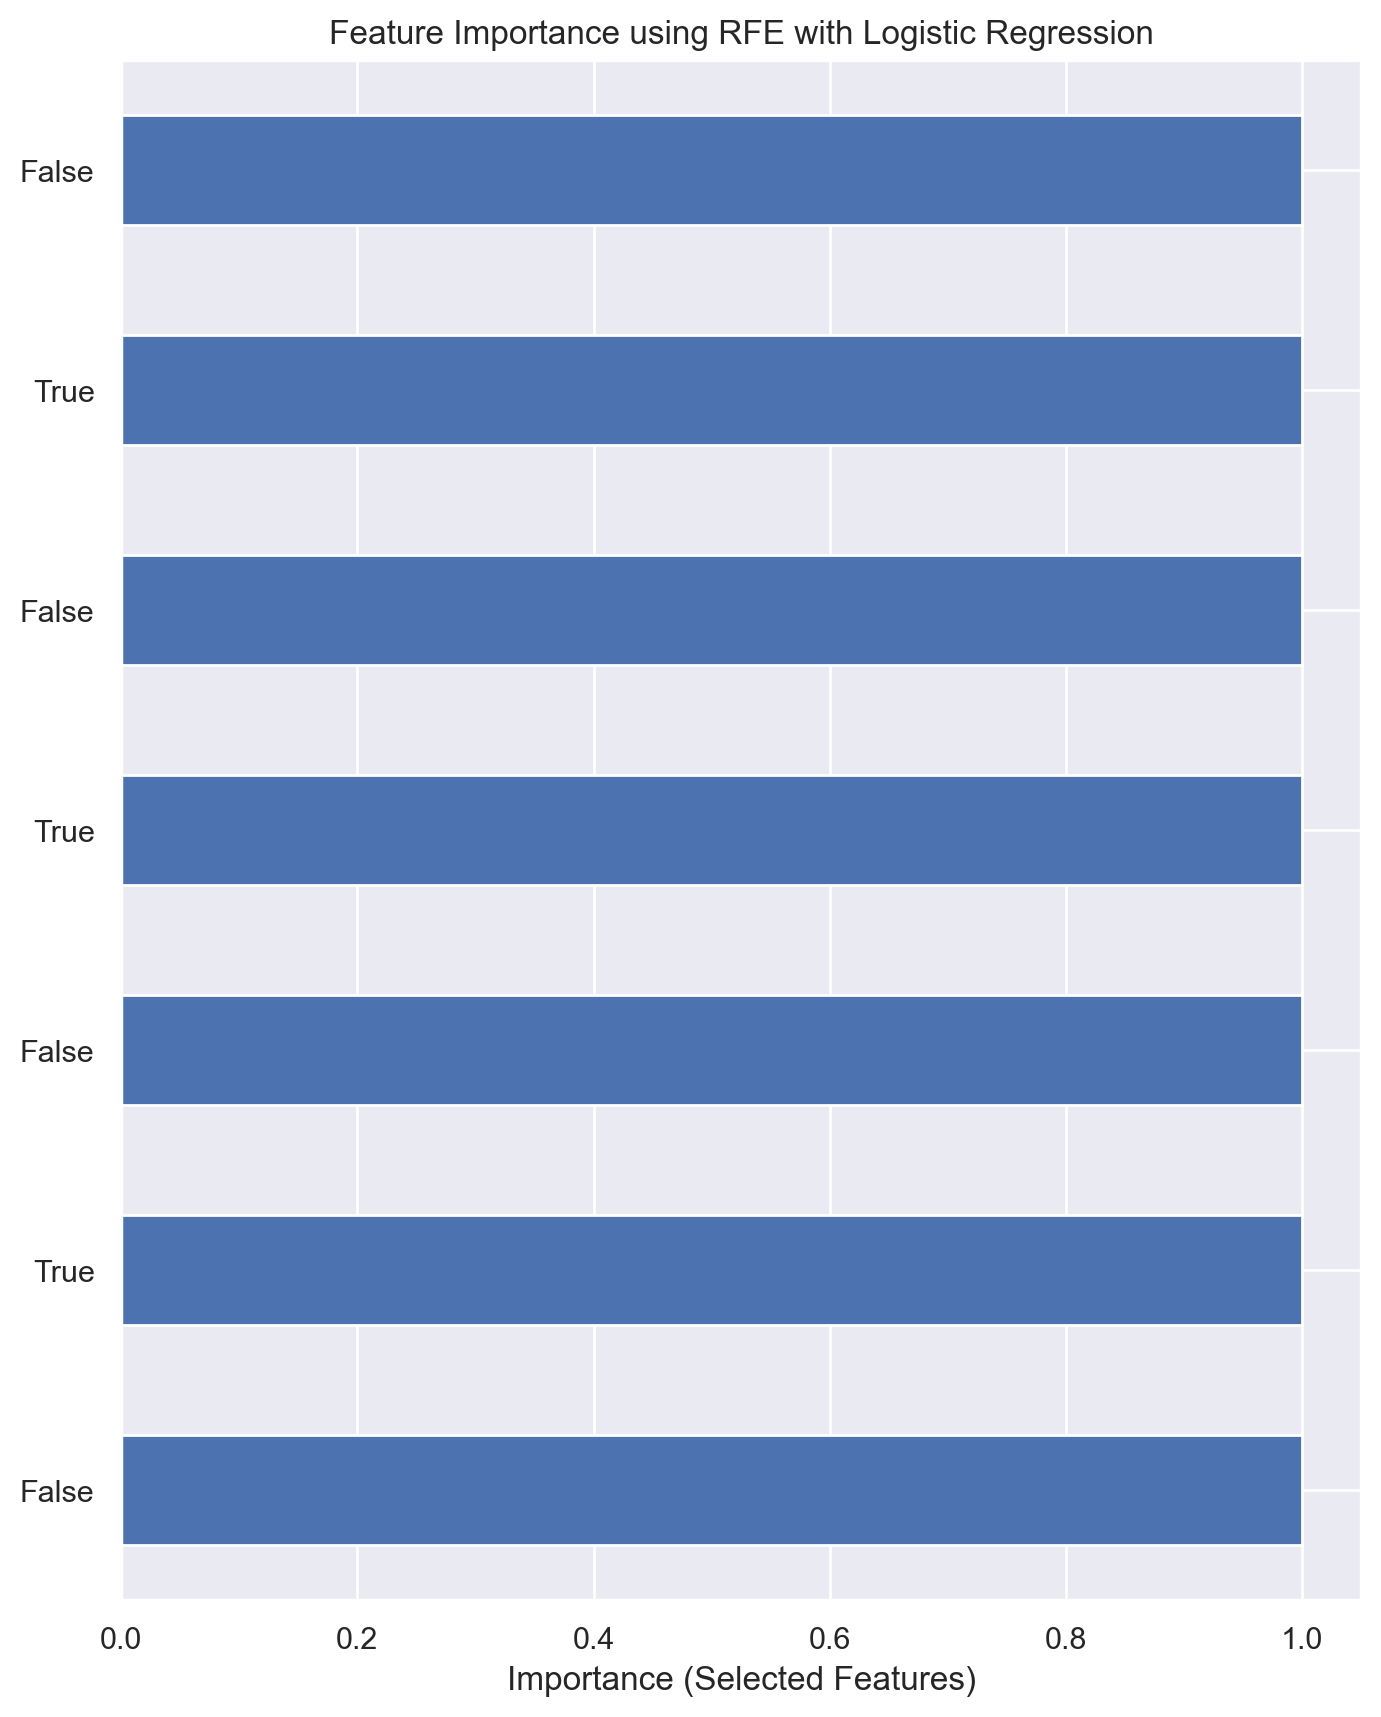

In [2295]:
# Function to plot the importance of selected features
def plot_rfe_importance(selected_features, model_name="RFE"):
    """
    Plot feature importance for selected features from RFE.

    Parameters:
    - selected_features: List of selected feature names from RFE.
    - model_name: Name of the model used for RFE.
    """
    # Convert selected features to a Series for plotting
    feature_importance = pd.Series([1] * len(selected_features), index=selected_features)
    feature_importance = feature_importance.sort_values()  # Sort for better visualization
    
    # Plot
    plt.figure(figsize=(8, 10))
    feature_importance.plot(kind="barh")
    plt.title(f"Feature Importance using {model_name}")
    plt.xlabel("Importance (Selected Features)")
    plt.show()

# Call the function to plot the selected features from RFE
plot_rfe_importance(selected_features_rfe, model_name="RFE with Logistic Regression")

In [2296]:
selected_features

['Average Weekly Wage', 'IME-4 Count', 'Receiving time']

<a class="anchor" id="LASSO">
    
### 4.5 LASSO

</a>

In [2298]:
from sklearn.linear_model import LassoCV

# Ensure X_train_num_2_scaled is a DataFrame with columns from X_train_num_2
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)

# Fit the LassoCV model
reg = LassoCV()
reg.fit(X_train_num_scaled_df, y_train)

# Create a Series of coefficients with column names as the index
coef = pd.Series(reg.coef_, index=X_train_num.columns)

selected_features_lasso = coef[coef != 0].index.tolist()

# Display the coefficients
print(coef)

Age at Injury            0.014004
Average Weekly Wage      9.427617
Number of Dependents    -0.000964
IME-4 Count              9.715186
Declaration time         0.991300
Receiving time          -0.704325
Receiving time of C-2    0.000000
dtype: float64


In [2299]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 1 variables


<a class="anchor" id="importantvariablesFS">
    
### 4.6 Important Variables from Feature Selection

</a>

In [2308]:


important_decision_tree = selected_columns_dt

# Important features identified by Lasso and RFE
important_lasso = selected_features_lasso


important_rfe = selected_features

# Combine all important features across methods
combined_important_features = set(important_decision_tree + important_lasso + important_rfe)

# Numeric features to check for high correlation
numeric_features = numeric_var

# Categorical features identified as important by Chi-square test
important_chi2_features = selected_columns_chi2


# Calculate correlation matrix for numeric features and remove highly correlated features
correlation_matrix = X_train[numeric_features].corr().abs()  # Calculate absolute correlations
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Drop features with high correlation based on a threshold, e.g., 0.8
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
filtered_numeric_features = [feature for feature in numeric_features if feature not in high_corr_features]

# Combine categorical and numeric features into the final selected features
selected_features = list(set(important_chi2_features + filtered_numeric_features + list(set(important_decision_tree))))

print("Final Selected Features for Model:")
print(selected_features)

Final Selected Features for Model:
['Carrier Type', 'Declaration time', 'WCIO Nature of Injury Code', 'cause_injury_category', 'District Name', 'Gender', 'Attorney/Representative', 'nature_injury_category', 'Carrier Name', 'COVID-19 Indicator', 'Medical Fee Region', 'Average Weekly Wage', 'Zip Code', 'body_category', 'Notification Status', 'WCIO Part Of Body Code', 'Age at Injury', 'Wage Replacement Eligibility', 'Receiving time', 'IME-4 Count', 'WCIO Cause of Injury Code', 'First Hearing Binary', 'Number of Dependents', 'Receiving time of C-2', 'Retirement Status', 'Industry Code', 'County of Injury', 'Alternative Dispute Resolution']


In [ ]:
#selected_features = ['District Name', 'COVID-19 Indicator', 'Retirement Status', 'WCIO Cause of Injury Code', 'Declaration time', 'Receiving time of C-2', 'Gender', 'First Hearing Binary', 'County of Injury', 'Carrier Type', 'Notification Status', 'WCIO Nature of Injury Code', 'IME-4 Count', 'WCIO Part Of Body Code', 'Alternative Dispute Resolution', 'Wage Replacement Eligibility', 'Carrier Name', 'Average Weekly Wage', 'Industry Code', 'Number of Dependents', 'Age at Injury', 'Receiving time', 'Medical Fee Region', 'Attorney/Representative']

In [2310]:
X_train = X_train[selected_features]

<a class="anchor" id="Modelling">
    
# 5. Modelling

</a>

In [2312]:
column_names = X_train.columns

In [2313]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=column_names)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=column_names)

In [2314]:
common_features = [feature for feature in selected_features if feature in X_train_scaled_df.columns]

# Subset X_train_scaled and X_val_scaled to include only the selected features
X_train_selected = X_train_scaled_df[common_features]
X_val_selected = X_val_scaled_df[common_features]

# Display the shapes of the modified datasets to confirm alignment
print("X_train with selected features shape:", X_train_selected.shape)
print("X_val with selected features shape:", X_val_selected.shape)

X_train with selected features shape: (430273, 28)
X_val with selected features shape: (143423, 28)


In [2315]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


# Dictionary to store results for each model
results = {}

# Evaluation function to train, predict, and calculate performance metrics
def evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train_selected, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_val_selected)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_val, y_pred)
    
    # Print results
    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
    print(f"Confusion Matrix for {model_name}:\n{conf_matrix}\n")
    
    # Store results for comparison
    results[model_name] = {'Accuracy': accuracy, 'F1 Score': f1, 'Confusion Matrix': conf_matrix}



In [2316]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, classification_report

# Dictionary to store results for each model
results = {}

# Enhanced evaluation function
def evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train_selected, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_val_selected)
    
    # Check if the model supports probability predictions for AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_val_selected)
    else:
        y_prob = None

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_val, y_pred)
    
    # For multi-class classification, compute macro-average ROC AUC if probabilities are available
    if y_prob is not None and len(np.unique(y_val)) > 2:
        auc = roc_auc_score(y_val, y_prob, multi_class='ovr', average='macro')
    elif y_prob is not None:
        auc = roc_auc_score(y_val, y_prob[:, 1])  # Binary classification
    else:
        auc = None

    # Print results
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    if auc is not None:
        print(f"{model_name} - ROC AUC: {auc:.4f}")
    print(f"Confusion Matrix for {model_name}:\n{conf_matrix}\n")
    print(f"Classification Report for {model_name}:\n{classification_report(y_val, y_pred)}\n")
    
    # Store results for comparison
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        'ROC AUC': auc if auc is not None else 'Not applicable'
    }


In [2317]:
### 5.1. Logistic Regression

In [2318]:
# 1. Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(logistic_model, "Logistic Regression")



Logistic Regression - Accuracy: 0.7455, Precision: 0.6876, Recall: 0.7455, F1 Score: 0.6919
Logistic Regression - ROC AUC: 0.8952
Confusion Matrix for Logistic Regression:
[[   94  2655   175   183    10     0     0     0]
 [  143 68911   774  2807    80     0     0     0]
 [   37  9312   813  6334   726     0     0     0]
 [   89  1778   525 32631  2089     0     0     0]
 [    0    12     7  7572  4473     0     0     0]
 [    0     0     5   952    95     0     0     0]
 [    0     0     0    18     6     0     0     0]
 [    0    15    12    75    15     0     0     0]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.26      0.03      0.05      3117
           1       0.83      0.95      0.89     72715
           2       0.35      0.05      0.08     17222
           3       0.65      0.88      0.74     37112
           4       0.60      0.37      0.46     12064
           5       0.00      0.00      0.00   

In [2319]:
# 2. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, "Decision Tree Classifier")



Decision Tree Classifier - Accuracy: 0.6793, Precision: 0.6915, Recall: 0.6793, F1 Score: 0.6852
Decision Tree Classifier - ROC AUC: 0.6550
Confusion Matrix for Decision Tree Classifier:
[[ 1395  1369   222   119    10     1     0     1]
 [ 1575 60620  8875  1542    86     6     2     9]
 [  218  7208  4078  4583  1019    96     1    19]
 [  150  1400  5211 24789  4603   869    26    64]
 [   11    95  1107  4211  6424   210     2     4]
 [    1     3    87   647   199   113     2     0]
 [    0     0     4    13     4     2     0     1]
 [    4    16    32    47     5     2     0    11]]

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.42      0.45      0.43      3117
           1       0.86      0.83      0.85     72715
           2       0.21      0.24      0.22     17222
           3       0.69      0.67      0.68     37112
           4       0.52      0.53      0.53     12064
           5       0.09   

In [2320]:

# 3. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, "Random Forest Classifier")



MemoryError: could not allocate 16777216 bytes

In [2344]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
evaluate_model(rf_model, "Random Forest Classifier")


Random Forest Classifier - Accuracy: 0.7834, Precision: 0.7503, Recall: 0.7834, F1 Score: 0.7424
Random Forest Classifier - ROC AUC: 0.8500
Confusion Matrix for Random Forest Classifier:
[[ 1523  1446    58    85     5     0     0     0]
 [  506 70273   683  1203    50     0     0     0]
 [   16  9049  1478  5991   687     0     0     1]
 [   11  1673   714 32470  2243     1     0     0]
 [    0    17    72  5368  6607     0     0     0]
 [    0     1     6   943   101     1     0     0]
 [    0     0     0    22     2     0     0     0]
 [    0    24     5    85     2     0     0     1]]

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.74      0.49      0.59      3117
           1       0.85      0.97      0.91     72715
           2       0.49      0.09      0.15     17222
           3       0.70      0.87      0.78     37112
           4       0.68      0.55      0.61     12064
           5       0.50   

In [2345]:
# 4. Support Vector Machine (SVM)
#svm_model = SVC(kernel='rbf', random_state=42)
#evaluate_model(svm_model, "Support Vector Machine (SVM)")


In [2346]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
evaluate_model(mlp_model, "Neural Network")


Neural Network - Accuracy: 0.7737, Precision: 0.7391, Recall: 0.7737, F1 Score: 0.7281
Neural Network - ROC AUC: 0.9247
Confusion Matrix for Neural Network:
[[  869  2028    55   159     6     0     0     0]
 [  423 69953   453  1851    35     0     0     0]
 [   51  9211  1186  6149   621     0     0     4]
 [   38  1942   517 32610  1994     0     0    11]
 [    0    25    61  5629  6349     0     0     0]
 [    0     1     6   962    83     0     0     0]
 [    0     0     0    24     0     0     0     0]
 [    1    22     8    77     4     0     0     5]]

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.63      0.28      0.39      3117
           1       0.84      0.96      0.90     72715
           2       0.52      0.07      0.12     17222
           3       0.69      0.88      0.77     37112
           4       0.70      0.53      0.60     12064
           5       0.00      0.00      0.00      1052
           6

In [2347]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
evaluate_model(nb_model, "Naive Bayes")

Naive Bayes - Accuracy: 0.1520, Precision: 0.6801, Recall: 0.1520, F1 Score: 0.1320
Naive Bayes - ROC AUC: 0.8093
Confusion Matrix for Naive Bayes:
[[  222   122  2282    23    98     0    46   324]
 [  453  5018 63574   355  1195     0   157  1963]
 [   30   105 10164   208  3124     1  2437  1153]
 [  389    15  5883  1058 12745     3 15896  1123]
 [    5     0   132   110  5291     0  6385   141]
 [    0     0     1     2    31     1  1006    11]
 [    1     0     0     0     0     0    21     2]
 [    0     0     7     0     3     0    75    32]]

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.20      0.07      0.11      3117
           1       0.95      0.07      0.13     72715
           2       0.12      0.59      0.20     17222
           3       0.60      0.03      0.05     37112
           4       0.24      0.44      0.31     12064
           5       0.20      0.00      0.00      1052
           6       0.00 

In [2348]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),  # Number of classes in the target
    use_label_encoder=False,  # Suppress warning
    eval_metric='mlogloss',   # Multiclass log loss
    random_state=42
)

# Evaluate the initial model
evaluate_model(xgb_model, "XGBoost")


XGBoost - Accuracy: 0.7921, Precision: 0.7587, Recall: 0.7921, F1 Score: 0.7504
XGBoost - ROC AUC: 0.9358
Confusion Matrix for XGBoost:
[[ 1628  1362    56    64     6     0     0     1]
 [  549 70999   512   604    50     0     0     1]
 [   21  9123  1443  5890   741     1     0     3]
 [   21  1667   584 32401  2427     4     1     7]
 [    0    22    84  4827  7130     0     0     1]
 [    0     1     6   937   107     1     0     0]
 [    0     0     2    19     3     0     0     0]
 [    0    23     8    78     2     0     0     6]]

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.73      0.52      0.61      3117
           1       0.85      0.98      0.91     72715
           2       0.54      0.08      0.14     17222
           3       0.72      0.87      0.79     37112
           4       0.68      0.59      0.63     12064
           5       0.17      0.00      0.00      1052
           6       0.00      0.00      0

In [2349]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model), 
        ('rf', rf_model), 
    #    ('svm', svm_model)
    ],
    voting='soft'
)
evaluate_model(ensemble_model, "Ensemble Model")


Ensemble Model - Accuracy: 0.7907, Precision: 0.7574, Recall: 0.7907, F1 Score: 0.7479
Ensemble Model - ROC AUC: 0.9332
Confusion Matrix for Ensemble Model:
[[ 1593  1401    50    67     6     0     0     0]
 [  522 70842   484   819    48     0     0     0]
 [   14  9144  1348  6015   700     0     0     1]
 [   15  1606   547 32658  2281     1     1     3]
 [    0    13    44  5046  6961     0     0     0]
 [    0     1     6   944   101     0     0     0]
 [    0     0     1    21     2     0     0     0]
 [    0    24     3    84     1     0     0     5]]

Classification Report for Ensemble Model:
              precision    recall  f1-score   support

           0       0.74      0.51      0.61      3117
           1       0.85      0.97      0.91     72715
           2       0.54      0.08      0.14     17222
           3       0.72      0.88      0.79     37112
           4       0.69      0.58      0.63     12064
           5       0.00      0.00      0.00      1052
           6

In [2350]:
from sklearn.ensemble import VotingClassifier

ensemble_model1 = VotingClassifier(
    estimators=[
        ('xgb', xgb_model), 
        ('rf', rf_model), 
        ("nn", mlp_model)
    ],
    voting='soft'
)
evaluate_model(ensemble_model1, "Ensemble Model")


Ensemble Model - Accuracy: 0.7884, Precision: 0.7575, Recall: 0.7884, F1 Score: 0.7442
Ensemble Model - ROC AUC: 0.9340
Confusion Matrix for Ensemble Model:
[[ 1406  1570    46    90     5     0     0     0]
 [  406 70735   425  1108    41     0     0     0]
 [   11  9147  1255  6150   659     0     0     0]
 [   14  1590   469 32905  2130     0     0     4]
 [    0    11    38  5238  6777     0     0     0]
 [    0     1     6   953    92     0     0     0]
 [    0     0     0    22     2     0     0     0]
 [    0    26     3    84     1     0     0     3]]

Classification Report for Ensemble Model:
              precision    recall  f1-score   support

           0       0.77      0.45      0.57      3117
           1       0.85      0.97      0.91     72715
           2       0.56      0.07      0.13     17222
           3       0.71      0.89      0.79     37112
           4       0.70      0.56      0.62     12064
           5       0.00      0.00      0.00      1052
           6

In [2351]:
# Summary of model performance for comparison
summary_df = pd.DataFrame({model: metrics for model, metrics in results.items()}).T[['Accuracy', 'F1 Score']]
print("\nSummary of Model Performance:")
print(summary_df)


Summary of Model Performance:
                          Accuracy  F1 Score
Logistic Regression       0.745501  0.691889
Decision Tree Classifier  0.679319  0.685163
Random Forest Classifier  0.783368   0.74235
Neural Network            0.773739  0.728081
Naive Bayes               0.152047  0.132007
XGBoost                   0.792118  0.750396
Ensemble Model            0.788444  0.744152


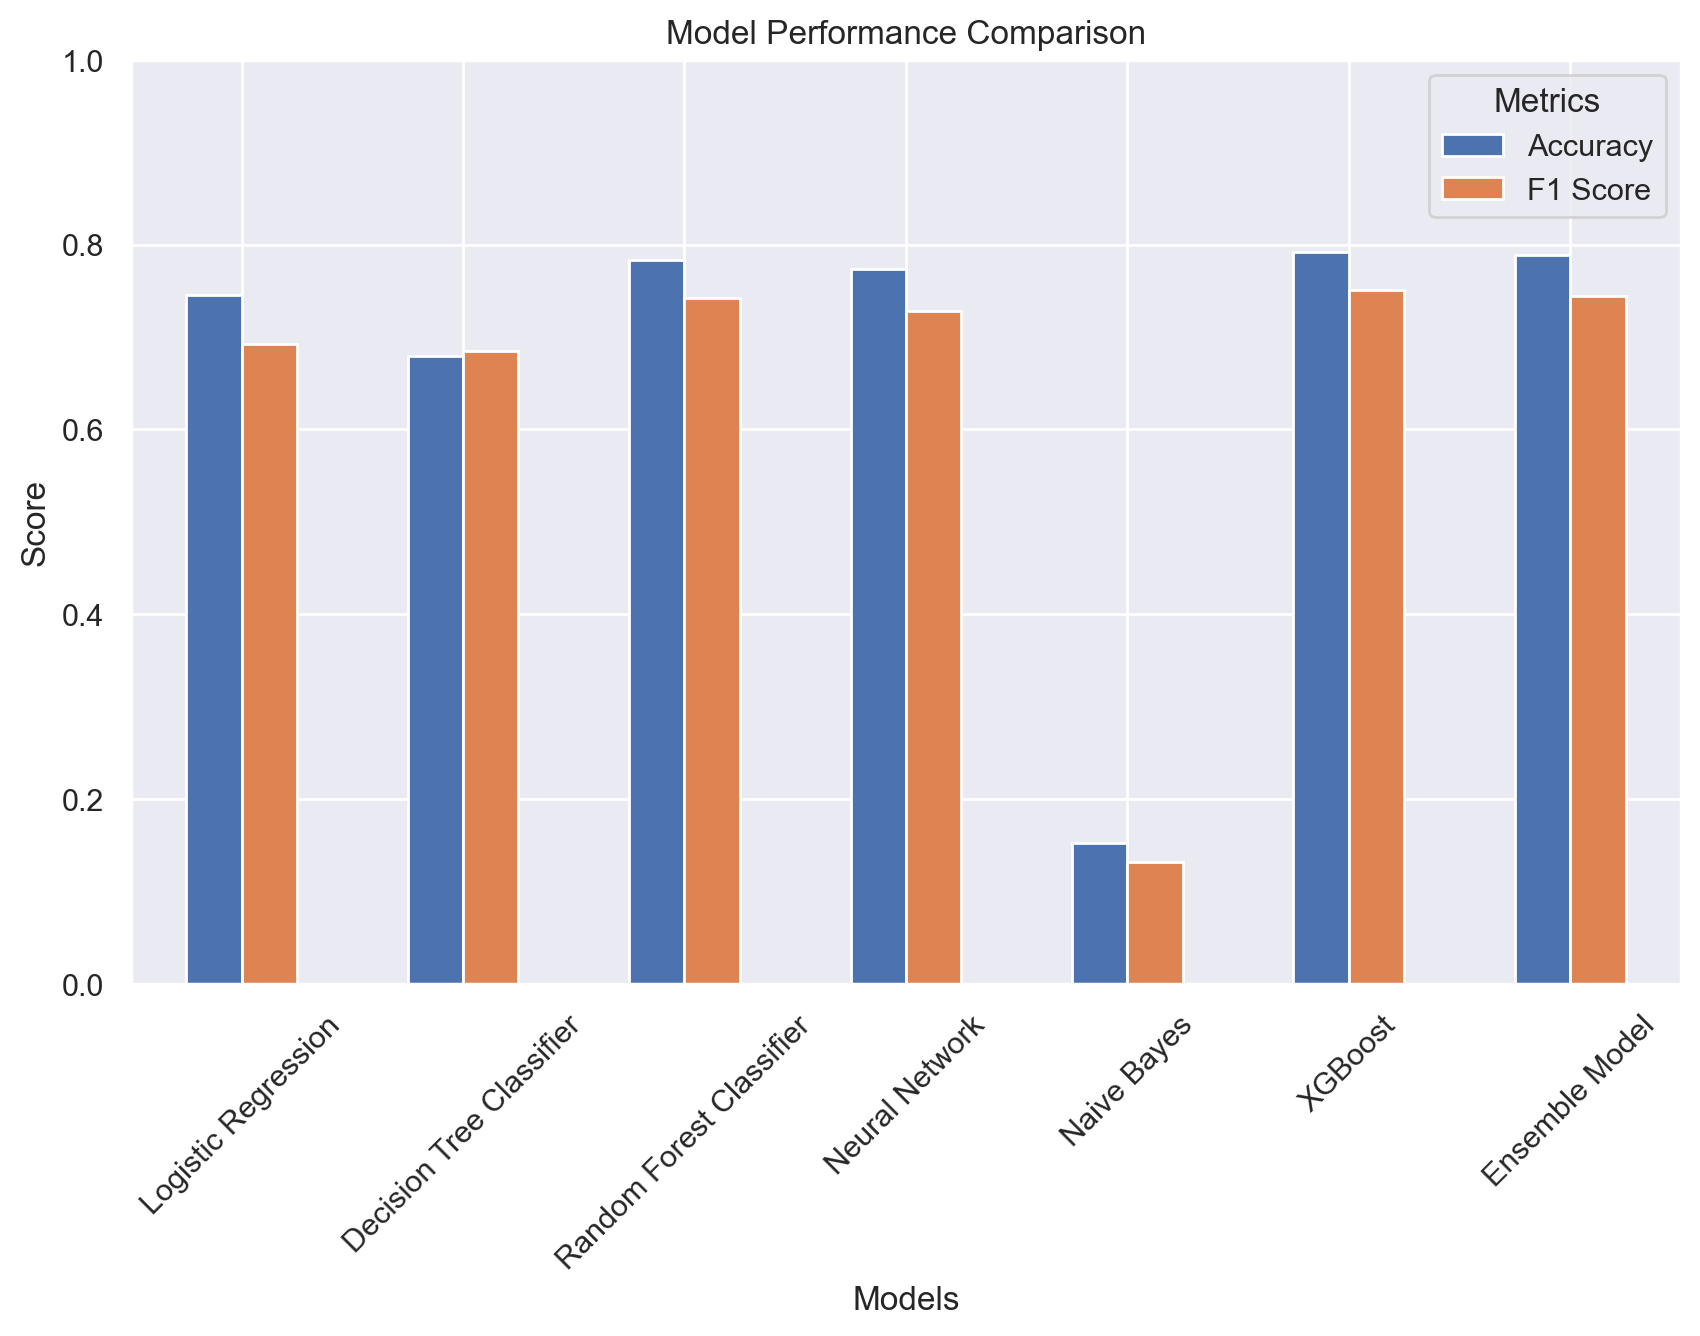

In [2352]:
# Plotting the bar chart for model comparison
summary_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.ylim(0, 1)  # Set y-axis limit for better comparison if needed
plt.show()

### Best Models Hyperparameters Tuning

In [2354]:

from sklearn.model_selection import GridSearchCV



# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]              # Whether bootstrap samples are used
}

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',        # Metric to optimize
    cv=3,                      # Number of cross-validation folds
    verbose=2,                 # Verbosity level
    n_jobs=-1                  # Use all available cores for computation
)

# Perform the grid search
grid_search_rf.fit(X_train_selected, y_train)

# Output the best parameters and best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation Score:", grid_search_rf.best_score_)

# Train the final Random Forest model with the best parameters
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the final model on the validation set
evaluate_model(best_rf_model, "Random Forest (Best Parameters)")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.7846646227159394
Random Forest (Best Parameters) - Accuracy: 0.7859, Precision: 0.7549, Recall: 0.7859, F1 Score: 0.7412
Random Forest (Best Parameters) - ROC AUC: 0.9218
Confusion Matrix for Random Forest (Best Parameters):
[[ 1535  1438    51    87     6     0     0     0]
 [  499 70441   414  1309    52     0     0     0]
 [   10  9209  1197  6181   625     0     0     0]
 [   14  1661   453 33051  1933     0     0     0]
 [    0    19    27  5523  6495     0     0     0]
 [    0     2     4   957    89     0     0     0]
 [    0     0     0    21     3     0     0     0]
 [    0    24     3    88     2     0     0     0]]

Classification Report for Random Forest (Best Parameters):
              precision    recall  f1-score   support

           0       0.75      0.49    

In [2355]:
selected_model = logistic_model

In [2356]:
X_train_selected

,Carrier Type,Declaration time,WCIO Nature of Injury Code,cause_injury_category,District Name,Gender,Attorney/Representative,nature_injury_category,Carrier Name,COVID-19 Indicator,...,Receiving time,IME-4 Count,WCIO Cause of Injury Code,First Hearing Binary,Number of Dependents,Receiving time of C-2,Retirement Status,Industry Code,County of Injury,Alternative Dispute Resolution
0,0.185558,0.050376,0.100000,0.888889,0.309168,0.697335,0.0,0.0,0.000468,0.0,...,0.868284,0.000000,0.744898,0.0,0.666667,0.291811,1.0,0.864198,0.224054,0.0
1,0.427181,0.050199,0.300000,0.111111,0.156808,1.000000,1.0,0.0,0.000839,0.0,...,0.868284,0.000000,0.897959,0.0,0.333333,0.291679,1.0,1.000000,0.117277,0.0
2,1.000000,0.050022,0.877778,0.444444,0.152480,0.697335,0.0,0.5,0.082027,0.0,...,0.868284,0.000000,0.306122,0.0,0.666667,0.291547,1.0,0.629630,0.254359,0.0
3,1.000000,0.050066,0.400000,0.888889,1.000000,0.697335,0.0,0.0,0.157748,0.0,...,0.868284,0.000000,0.755102,0.0,0.833333,0.291580,1.0,0.407407,0.655192,0.0
4,1.000000,0.050287,0.433333,0.888889,1.000000,1.000000,0.0,0.0,0.040552,0.0,...,0.868284,0.013699,0.765306,0.0,0.833333,0.291745,1.0,0.148148,0.655192,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430268,1.000000,0.049934,0.166667,0.666667,0.309168,1.000000,1.0,0.0,0.113838,0.0,...,0.868284,0.068493,0.571429,1.0,1.000000,0.291481,1.0,0.555556,0.189407,0.0
430269,0.427181,0.053380,0.100000,0.444444,1.000000,0.697335,1.0,0.0,0.194655,0.0,...,0.868284,0.013699,0.244898,0.0,0.166667,0.294052,1.0,1.000000,0.655192,0.0
430270,1.000000,0.055590,0.911111,0.111111,1.000000,0.697335,1.0,0.5,0.047483,1.0,...,0.868284,0.095890,0.836735,1.0,0.000000,0.295699,1.0,0.629630,0.963315,0.0
430271,0.185558,0.049934,0.566667,0.666667,0.136574,1.000000,0.0,0.0,0.020660,0.0,...,0.868284,0.000000,0.561224,0.0,0.333333,0.291481,1.0,0.407407,0.395583,0.0


In [2357]:
selected_columns = X_train_selected.columns

In [2358]:
selected_columns

Index(['Carrier Type', 'Declaration time', 'WCIO Nature of Injury Code',
       'cause_injury_category', 'District Name', 'Gender',
       'Attorney/Representative', 'nature_injury_category', 'Carrier Name',
       'COVID-19 Indicator', 'Medical Fee Region', 'Average Weekly Wage',
       'Zip Code', 'body_category', 'Notification Status',
       'WCIO Part Of Body Code', 'Age at Injury',
       'Wage Replacement Eligibility', 'Receiving time', 'IME-4 Count',
       'WCIO Cause of Injury Code', 'First Hearing Binary',
       'Number of Dependents', 'Receiving time of C-2', 'Retirement Status',
       'Industry Code', 'County of Injury', 'Alternative Dispute Resolution'],
      dtype='object')

# 6. Predictions

In [2360]:
test_columns = selected_columns
test_col = test[test_columns]

In [2361]:
test.columns

Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Average Weekly Wage', 'Carrier Name',
       'Carrier Type', 'Claim Identifier', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Number of Dependents', 'cause_injury_category',
       'nature_injury_category', 'body_category', 'First Hearing Binary',
       'Declaration time', 'Receiving time', 'Receiving time of C-2',
       'Wage Replacement Eligibility', 'Retirement Status',
       'Notification Status'],
      dtype='object')

In [2362]:
print("Model feature names:", selected_model.feature_names_in_)
print("Test data columns:", test_scaled.columns)

Model feature names: ['Carrier Type' 'Declaration time' 'WCIO Nature of Injury Code'
 'cause_injury_category' 'District Name' 'Gender'
 'Attorney/Representative' 'nature_injury_category' 'Carrier Name'
 'COVID-19 Indicator' 'Medical Fee Region' 'Average Weekly Wage'
 'Zip Code' 'body_category' 'Notification Status' 'WCIO Part Of Body Code'
 'Age at Injury' 'Wage Replacement Eligibility' 'Receiving time'
 'IME-4 Count' 'WCIO Cause of Injury Code' 'First Hearing Binary'
 'Number of Dependents' 'Receiving time of C-2' 'Retirement Status'
 'Industry Code' 'County of Injury' 'Alternative Dispute Resolution']
Test data columns: Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Average Weekly Wage', 'Carrier Name',
       'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'Gender', 'IME-4 Count', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of

In [2363]:
expected_features_rf = selected_model.feature_names_in_  # Features used during training
test_col = test_col[expected_features_rf]          # Align test data columns
test_scaled_2 = test_scaled[expected_features_rf]

In [2364]:
test_col['Claim Injury Type'] = selected_model.predict(test_scaled_2)

In [2365]:
predictions = test_col['Claim Injury Type']

In [2366]:
# Mapping for encoded labels
label_mapping = {
    0: '1. CANCELLED',
    1: '2. NON-COMP',
    2: '3. MED ONLY',
    3: '4. TEMPORARY',
    4: '5. PPD SCH LOSS',
    5: '6. PPD NSL',
    6: '7. PTD',
    7: '8. DEATH'
}

# Decode predictions (Assuming `predictions` are the encoded integer predictions)
predictions_decoded = [label_mapping[pred] for pred in predictions]

# Prepare the submission DataFrame
submission = pd.DataFrame({
    "Claim Identifier": test["Claim Identifier"],  # Ensure this is the correct identifier
    "Claim Injury Type": predictions_decoded       # Decoded predictions
})

# Ensure submission is sorted by Claim Identifier if required
submission = submission.sort_values(by="Claim Identifier").reset_index(drop=True)

# Save to CSV
submission.to_csv('submission_logistic28.csv', index=False)


In [2367]:
selected_model_2 = rf_model

In [2368]:
expected_features = selected_model_2.feature_names_in_  # Features used during training
test_col = test_col[expected_features]          # Align test data columns


In [2369]:
test_col['Claim Injury Type'] = selected_model_2.predict(test_scaled_2)

In [2370]:
predictions = test_col['Claim Injury Type']

In [2371]:
# Mapping for encoded labels
label_mapping = {
    0: '1. CANCELLED',
    1: '2. NON-COMP',
    2: '3. MED ONLY',
    3: '4. TEMPORARY',
    4: '5. PPD SCH LOSS',
    5: '6. PPD NSL',
    6: '7. PTD',
    7: '8. DEATH'
}

# Decode predictions (Assuming `predictions` are the encoded integer predictions)
predictions_decoded = [label_mapping[pred] for pred in predictions]

# Prepare the submission DataFrame
submission = pd.DataFrame({
    "Claim Identifier": test["Claim Identifier"],  # Ensure this is the correct identifier
    "Claim Injury Type": predictions_decoded       # Decoded predictions
})

# Ensure submission is sorted by Claim Identifier if required
submission = submission.sort_values(by="Claim Identifier").reset_index(drop=True)

# Save to CSV
submission.to_csv('submission_rf30.csv', index=False)

In [2372]:
selected_model_3 = xgb_model

In [2373]:
expected_features = selected_model_3.feature_names_in_  # Features used during training
test_col = test_col[expected_features]          # Align test data columns


In [2374]:
test_col['Claim Injury Type'] = selected_model_3.predict(test_scaled_2)

In [2375]:
predictions = test_col['Claim Injury Type']

In [2376]:
# Mapping for encoded labels
label_mapping = {
    0: '1. CANCELLED',
    1: '2. NON-COMP',
    2: '3. MED ONLY',
    3: '4. TEMPORARY',
    4: '5. PPD SCH LOSS',
    5: '6. PPD NSL',
    6: '7. PTD',
    7: '8. DEATH'
}

# Decode predictions (Assuming `predictions` are the encoded integer predictions)
predictions_decoded = [label_mapping[pred] for pred in predictions]

# Prepare the submission DataFrame
submission = pd.DataFrame({
    "Claim Identifier": test["Claim Identifier"],  # Ensure this is the correct identifier
    "Claim Injury Type": predictions_decoded       # Decoded predictions
})

# Ensure submission is sorted by Claim Identifier if required
submission = submission.sort_values(by="Claim Identifier").reset_index(drop=True)

# Save to CSV
submission.to_csv('submission_xbg29.csv', index=False)